### libray inclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,roc_curve,recall_score,roc_auc_score,auc,confusion_matrix,cohen_kappa_score, f1_score, precision_score,matthews_corrcoef 
from tqdm import tqdm
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectPercentile, f_classif, chi2, SelectFromModel, SelectKBest
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Optional imports for preprocessing and visualization
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)

Radiomics Feature Analysis

In [3]:
Final_accuracy={}

In [4]:

import pandas as pd

# Load the main dataset
main_df = pd.read_csv("./Radiomics_Feature.csv")

# Load the test dataset
test_df = pd.read_csv("./RM_features_Test.csv")

# Identify rows in the main dataset that are also present in the test dataset
test_indices = main_df.merge(test_df, on=['Patient_id'], how='inner').index

# Remove the test data details from the main dataset
cleaned_main_df = main_df.drop(test_indices)

# Save the cleaned main dataset to a new CSV file
cleaned_main_df.to_csv("Radiomics_Feature_Train.csv", index=False)


In [5]:
df_rm=pd.read_csv("Radiomics_Feature_Train.csv")

In [6]:
print(df_rm.shape)


(1378, 1221)


In [7]:
df_rm['Malignancy'].value_counts()

0    1037
1     341
Name: Malignancy, dtype: int64

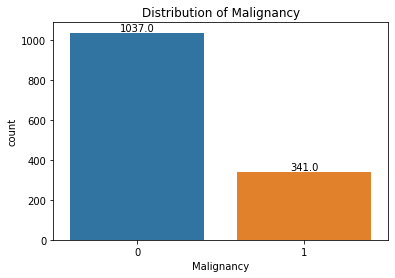

In [8]:
# If you want to order the bars by count, you can use the order parameter
order = df_rm['Malignancy'].value_counts().index
ax = sns.countplot(x='Malignancy', data=df_rm, order=order)

plt.title('Distribution of Malignancy')

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [9]:
import tensorflow as tf
import os
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load the model
model = load_model('feature_extractor_model_27-05-2024_128.h5')

# Load or prepare your test data (replace this with your actual test data)
# X_test = ... 
# y_test = ...
train_data_path = r'../../DataSet Files/ROI_ny_files'
train_patients = [name for name in os.listdir(train_data_path) if os.path.isfile(os.path.join(train_data_path, name))]
file_list = sorted(train_patients)
print(file_list)

# For a classification model, you might need to convert predictions to class labels



['LIDC-IDRI-0001_1_roi.npy', 'LIDC-IDRI-0002_1_roi.npy', 'LIDC-IDRI-0003_1_roi.npy', 'LIDC-IDRI-0003_2_roi.npy', 'LIDC-IDRI-0003_3_roi.npy', 'LIDC-IDRI-0004_1_roi.npy', 'LIDC-IDRI-0005_1_roi.npy', 'LIDC-IDRI-0005_2_roi.npy', 'LIDC-IDRI-0006_1_roi.npy', 'LIDC-IDRI-0006_2_roi.npy', 'LIDC-IDRI-0007_1_roi.npy', 'LIDC-IDRI-0008_1_roi.npy', 'LIDC-IDRI-0008_2_roi.npy', 'LIDC-IDRI-0010_1_roi.npy', 'LIDC-IDRI-0010_2_roi.npy', 'LIDC-IDRI-0011_1_roi.npy', 'LIDC-IDRI-0011_2_roi.npy', 'LIDC-IDRI-0011_3_roi.npy', 'LIDC-IDRI-0011_4_roi.npy', 'LIDC-IDRI-0011_5_roi.npy', 'LIDC-IDRI-0011_6_roi.npy', 'LIDC-IDRI-0011_7_roi.npy', 'LIDC-IDRI-0012_10_roi.npy', 'LIDC-IDRI-0012_1_roi.npy', 'LIDC-IDRI-0012_2_roi.npy', 'LIDC-IDRI-0012_3_roi.npy', 'LIDC-IDRI-0012_4_roi.npy', 'LIDC-IDRI-0012_5_roi.npy', 'LIDC-IDRI-0012_6_roi.npy', 'LIDC-IDRI-0012_7_roi.npy', 'LIDC-IDRI-0012_8_roi.npy', 'LIDC-IDRI-0012_9_roi.npy', 'LIDC-IDRI-0013_1_roi.npy', 'LIDC-IDRI-0013_2_roi.npy', 'LIDC-IDRI-0013_3_roi.npy', 'LIDC-IDRI-0014_1_

In [10]:
print(len(file_list))
ls=[]
ls=set(file_list)-set(df_rm['Patient_id'])
print(len(set(file_list)-set(df_rm['Patient_id'])))

1393
15


In [11]:
filtered_list = [item for item in file_list if item not in ls]
filtered_list

['LIDC-IDRI-0011_1_roi.npy',
 'LIDC-IDRI-0011_2_roi.npy',
 'LIDC-IDRI-0011_3_roi.npy',
 'LIDC-IDRI-0011_4_roi.npy',
 'LIDC-IDRI-0011_5_roi.npy',
 'LIDC-IDRI-0011_6_roi.npy',
 'LIDC-IDRI-0011_7_roi.npy',
 'LIDC-IDRI-0012_10_roi.npy',
 'LIDC-IDRI-0012_1_roi.npy',
 'LIDC-IDRI-0012_2_roi.npy',
 'LIDC-IDRI-0012_3_roi.npy',
 'LIDC-IDRI-0012_4_roi.npy',
 'LIDC-IDRI-0012_5_roi.npy',
 'LIDC-IDRI-0012_6_roi.npy',
 'LIDC-IDRI-0012_7_roi.npy',
 'LIDC-IDRI-0012_8_roi.npy',
 'LIDC-IDRI-0012_9_roi.npy',
 'LIDC-IDRI-0013_1_roi.npy',
 'LIDC-IDRI-0013_2_roi.npy',
 'LIDC-IDRI-0013_3_roi.npy',
 'LIDC-IDRI-0014_1_roi.npy',
 'LIDC-IDRI-0016_1_roi.npy',
 'LIDC-IDRI-0016_2_roi.npy',
 'LIDC-IDRI-0016_3_roi.npy',
 'LIDC-IDRI-0016_4_roi.npy',
 'LIDC-IDRI-0016_5_roi.npy',
 'LIDC-IDRI-0018_1_roi.npy',
 'LIDC-IDRI-0018_2_roi.npy',
 'LIDC-IDRI-0018_3_roi.npy',
 'LIDC-IDRI-0018_4_roi.npy',
 'LIDC-IDRI-0020_1_roi.npy',
 'LIDC-IDRI-0021_1_roi.npy',
 'LIDC-IDRI-0023_1_roi.npy',
 'LIDC-IDRI-0024_1_roi.npy',
 'LIDC-IDRI-0

In [12]:
data = [np.expand_dims(np.load(f'{train_data_path}/{file}'), axis=-1) for file in filtered_list]
X_train = np.array(data)
# Ensure X_test is a NumPy array
# X_test = np.array(X_test)

# Make predictions
predictions = model.predict(X_train)

predictions_df = pd.DataFrame(predictions)
predictions_df['Patient_id']=df_rm['Patient_id']
# Save to CSV
predictions_df.to_csv('Deep_Learning_Features.csv', index=False)

44/44 [==============================] - 245s 5s/step


Fuse Model Analysis with 1218 Features and 128 Features

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df_rm = pd.read_csv("./Radiomics_Feature_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features.csv")
merged_data = pd.merge(df_rm, df_dl, on='Patient_id', how='inner')

print(merged_data.shape,df_rm.shape,df_dl.shape)
merged_data.head()
# Define features and target
X = merged_data.drop(columns=['Patient_id', 'nodule no','Malignancy'])
y = merged_data['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Standardize the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")

    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    #y_test = np.array(y_test).reshape(-1)
    #y_pred = np.array(y_pred).reshape(-1)
    #print(y_pred.shape,y_pred)
    # Ensure y_test and y_pred are 1-dimensional
    #y_test = y_test.ravel()
   # y_pred = y_pred.ravel()
    
    #print(y_test.shape,y_test)
    #y_test = y_test.values[:, -1]
    #y_pred = y_pred[:, -1]
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model
joblib.dump(best_model, 'best_random_forest_model_1218_128_features.pkl')

# Standardize the full dataset for making final predictions
X_standardized = scaler.transform(X)
y_pred_best = best_model.predict(X_standardized)

# Save predictions to a CSV file
df_predictions = pd.DataFrame({'True Label': y, 'Predicted Label': y_pred_best})
df_predictions.to_csv('predictions_1218.csv', index=False)
Final_accuracy['RM 1218 DL 128 Features']=best_accuracy
# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")


(1378, 1349) (1378, 1221) (1378, 129)
Fold 1:
------------------------------
Accuracy: 0.9494
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       212
           1       0.92      0.99      0.95       203

    accuracy                           0.95       415
   macro avg       0.95      0.95      0.95       415
weighted avg       0.95      0.95      0.95       415

Confusion Matrix:
 [[194  18]
 [  3 200]]
Fold 2:
------------------------------
Accuracy: 0.9711
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       191
           1       0.97      0.97      0.97       224

    accuracy                           0.97       415
   macro avg       0.97      0.97      0.97       415
weighted avg       0.97      0.97      0.97       415

Confusion Matrix:
 [[185   6]
 [  6 218]]
Fold 3:
------------------------------
Accuracy: 0.9494
Classifi

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Feature Selection 200+128

[0.00090449 0.00099517 0.00110468 ... 0.00061361 0.00046923 0.000861  ]


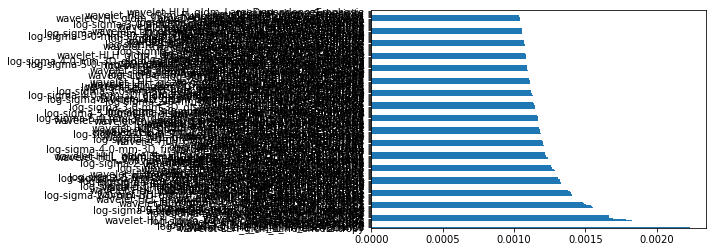

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
Rm_df = pd.read_csv('./Radiomics_Feature.csv')
Rm_df.fillna(0, inplace=True)
# Separate features (X) and target variable (y)
df=Rm_df.drop(columns=['Patient_id','nodule no'])
X = df.drop('Malignancy', axis=1)
y = df['Malignancy']

# Split the dataset into training and testing sets


# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)

model = ExtraTreesClassifier()
model.fit(X_standardized,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(200).plot(kind='barh')
plt.show()

In [15]:
top_features_200 = feat_importances.nlargest(200)  # Get the top 200 features
RM_200_top_feature_names = top_features_200.index.tolist()  # Get the names of the top features as a list
print(RM_200_top_feature_names)
X_200=df[RM_200_top_feature_names]



['wavelet-LLH_glcm_DifferenceEntropy', 'wavelet-LHL_glcm_InverseVariance', 'log-sigma-3-0-mm-3D_glrlm_RunVariance', 'log-sigma-5-0-mm-3D_firstorder_Range', 'wavelet-LHL_glcm_Idmn', 'wavelet-LHL_glcm_Idn', 'wavelet-LHL_glcm_DifferenceEntropy', 'log-sigma-4-0-mm-3D_firstorder_Skewness', 'wavelet-HLH_glrlm_LongRunLowGrayLevelEmphasis', 'wavelet-LHL_glcm_Imc1', 'wavelet-HLH_glrlm_RunVariance', 'wavelet-LLH_glcm_Idmn', 'wavelet-LHL_glcm_Contrast', 'wavelet-HHL_firstorder_Kurtosis', 'log-sigma-5-0-mm-3D_firstorder_Skewness', 'log-sigma-3-0-mm-3D_glrlm_RunEntropy', 'wavelet-LHL_gldm_GrayLevelNonUniformity', 'log-sigma-5-0-mm-3D_glszm_GrayLevelNonUniformity', 'wavelet-LLH_glcm_DifferenceAverage', 'log-sigma-5-0-mm-3D_firstorder_10Percentile', 'log-sigma-5-0-mm-3D_firstorder_Variance', 'wavelet-LLH_glcm_Imc2', 'wavelet-LLH_glcm_Imc1', 'wavelet-HLH_glszm_LowGrayLevelZoneEmphasis', 'log-sigma-4-0-mm-3D_firstorder_Kurtosis', 'wavelet-LLH_glcm_DifferenceVariance', 'wavelet-LHL_glcm_Imc2', 'wavelet-

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Feature_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features.csv")
# Define features and target
# Specify the feature names
X_200 = df[RM_200_top_feature_names]
X_200_DL_featues= pd.concat([X_200, df_dl], axis=1)
X_200_DL_featues=X_200_DL_featues.drop('Patient_id', axis=1)
y = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_200_DL_featues, y)

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_200_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model

joblib.dump(best_model, 'best_random_forest_model_200_128_features.pkl')
# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)
y_pred_best = best_model.predict(X_200_DL_featues)

# Save predictions to a CSV file
Final_accuracy['RM 200 and 128 DL Features']=best_accuracy

# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")


Fold 1:
------------------------------
Accuracy: 0.9542
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       212
           1       0.93      0.99      0.95       203

    accuracy                           0.95       415
   macro avg       0.96      0.95      0.95       415
weighted avg       0.96      0.95      0.95       415

Confusion Matrix:
 [[196  16]
 [  3 200]]
Fold 2:
------------------------------
Accuracy: 0.9639
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       191
           1       0.96      0.97      0.97       224

    accuracy                           0.96       415
   macro avg       0.96      0.96      0.96       415
weighted avg       0.96      0.96      0.96       415

Confusion Matrix:
 [[182   9]
 [  6 218]]
Fold 3:
------------------------------
Accuracy: 0.9518
Classification Report:
               precisio

Radiomics Model with 100 

In [17]:
top_features_100 = feat_importances.nlargest(100)  # Get the top 100 features
RM_100_top_feature_names = top_features_100.index.tolist()  # Get the names of the top features as a list
print(RM_100_top_feature_names)
X_100=df[RM_100_top_feature_names]

['wavelet-LLH_glcm_DifferenceEntropy', 'wavelet-LHL_glcm_InverseVariance', 'log-sigma-3-0-mm-3D_glrlm_RunVariance', 'log-sigma-5-0-mm-3D_firstorder_Range', 'wavelet-LHL_glcm_Idmn', 'wavelet-LHL_glcm_Idn', 'wavelet-LHL_glcm_DifferenceEntropy', 'log-sigma-4-0-mm-3D_firstorder_Skewness', 'wavelet-HLH_glrlm_LongRunLowGrayLevelEmphasis', 'wavelet-LHL_glcm_Imc1', 'wavelet-HLH_glrlm_RunVariance', 'wavelet-LLH_glcm_Idmn', 'wavelet-LHL_glcm_Contrast', 'wavelet-HHL_firstorder_Kurtosis', 'log-sigma-5-0-mm-3D_firstorder_Skewness', 'log-sigma-3-0-mm-3D_glrlm_RunEntropy', 'wavelet-LHL_gldm_GrayLevelNonUniformity', 'log-sigma-5-0-mm-3D_glszm_GrayLevelNonUniformity', 'wavelet-LLH_glcm_DifferenceAverage', 'log-sigma-5-0-mm-3D_firstorder_10Percentile', 'log-sigma-5-0-mm-3D_firstorder_Variance', 'wavelet-LLH_glcm_Imc2', 'wavelet-LLH_glcm_Imc1', 'wavelet-HLH_glszm_LowGrayLevelZoneEmphasis', 'log-sigma-4-0-mm-3D_firstorder_Kurtosis', 'wavelet-LLH_glcm_DifferenceVariance', 'wavelet-LHL_glcm_Imc2', 'wavelet-

In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Feature_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features.csv")
# Define features and target
# Specify the feature names
X_100 = df[RM_100_top_feature_names]
X_100_DL_featues= pd.concat([X_100, df_dl], axis=1)
X_100_DL_featues=X_100_DL_featues.drop('Patient_id', axis=1)
y = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_100_DL_featues, y)

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_100_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model

joblib.dump(best_model, 'best_random_forest_model_100_128_features.pkl')
# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)
y_pred_best = best_model.predict(X_100_DL_featues)

# Save predictions to a CSV file
Final_accuracy['RM 100 and 128 DL Features']=best_accuracy

# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")

Fold 1:
------------------------------
Accuracy: 0.9590
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       212
           1       0.93      0.99      0.96       203

    accuracy                           0.96       415
   macro avg       0.96      0.96      0.96       415
weighted avg       0.96      0.96      0.96       415

Confusion Matrix:
 [[198  14]
 [  3 200]]
Fold 2:
------------------------------
Accuracy: 0.9590
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       191
           1       0.95      0.97      0.96       224

    accuracy                           0.96       415
   macro avg       0.96      0.96      0.96       415
weighted avg       0.96      0.96      0.96       415

Confusion Matrix:
 [[180  11]
 [  6 218]]
Fold 3:
------------------------------
Accuracy: 0.9542
Classification Report:
               precisio

1218 RM and 20 Deep Learning

[1.96418784e-02 0.00000000e+00 0.00000000e+00 1.80040896e-02
 0.00000000e+00 4.14057200e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.38774794e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.27826998e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.11298448e-02 0.00000000e+00
 1.44066122e-02 1.53575525e-02 0.00000000e+00 3.59868623e-02
 1.31772241e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.19192313e-02 0.00000000e+00
 0.00000000e+00 4.36527296e-02 0.00000000e+00 1.19916599e-02
 0.00000000e+00 0.00000000e+00 1.52145809e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.68737248e-02
 0.00000000e+00 4.88676008e-02 3.64589228e-03 0.00000000e+00
 0.00000000e+00 1.92502694e-02 0.00000000e+00 1.72611089e-02
 0.00000000e+00 0.000000

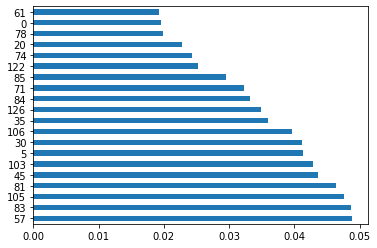

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
df_dl=pd.read_csv('./Deep_Learning_Features_Full.csv')
df = pd.read_csv("./Radiomics_Feature.csv")
df_dl.fillna(0, inplace=True)
# Separate features (X) and target variable (y)


X=df_dl.drop(columns=['Patient_id'])

y = df['Malignancy']

# Split the dataset into training and testing sets


# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)

model = ExtraTreesClassifier()
model.fit(X_standardized,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [20]:
top_20_features = feat_importances.nlargest(20)  # Get the top 200 features
DL_20_top_feature_names = top_20_features.index.tolist()  # Get the names of the top features as a list
print(DL_20_top_feature_names)
X_20=df_dl[DL_20_top_feature_names]

top_10_features = feat_importances.nlargest(10)  # Get the top 200 features
DL_10_top_feature_names = top_10_features.index.tolist()  # Get the names of the top features as a list
print(DL_10_top_feature_names)
X_10=df_dl[DL_10_top_feature_names]


['57', '83', '105', '81', '45', '103', '5', '30', '106', '35', '126', '84', '71', '85', '122', '74', '20', '78', '0', '61']
['57', '83', '105', '81', '45', '103', '5', '30', '106', '35']


In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Feature_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features.csv")
# Define features and target
# Specify the feature names
X_rm=df.drop(['Patient_id','Malignancy','nodule no'], axis=1)

X_20_DL_featues= pd.concat([X_rm, X_20], axis=1)

y = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_20_DL_featues, y)

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_20_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model

joblib.dump(best_model, 'best_random_forest_model_1218_20_features.pkl')
# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)
y_pred_best = best_model.predict(X_20_DL_featues)

# Save predictions to a CSV file
Final_accuracy['RM 1218 and 20 DL Features']=best_accuracy

# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")

ValueError: Length mismatch: Expected axis has 2074 elements, new values have 2089 elements

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Feature_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features.csv")
# Define features and target
# Specify the feature names
X_rm=df.drop(['Patient_id','Malignancy','nodule no'], axis=1)

X_10_DL_featues= pd.concat([X_rm, X_10], axis=1)

y = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_10_DL_featues, y)

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_10_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model

joblib.dump(best_model, 'best_random_forest_model_1218_10_features.pkl')
# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)
y_pred_best = best_model.predict(X_10_DL_featues)

# Save predictions to a CSV file
Final_accuracy['RM 1218 and 10 DL Features']=best_accuracy

# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")

Fold 1:
------------------------------
Accuracy: 0.9422
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       212
           1       0.91      0.98      0.94       203

    accuracy                           0.94       415
   macro avg       0.94      0.94      0.94       415
weighted avg       0.94      0.94      0.94       415

Confusion Matrix:
 [[193  19]
 [  5 198]]
Fold 2:
------------------------------
Accuracy: 0.9687
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       191
           1       0.97      0.97      0.97       224

    accuracy                           0.97       415
   macro avg       0.97      0.97      0.97       415
weighted avg       0.97      0.97      0.97       415

Confusion Matrix:
 [[184   7]
 [  6 218]]
Fold 3:
------------------------------
Accuracy: 0.9422
Classification Report:
               precisio

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Feature_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features.csv")
# Define features and target
# Specify the feature names
X_200 = df[RM_200_top_feature_names]
X_220_DL_featues= pd.concat([X_200, X_20], axis=1)
#X_220_DL_featues=X_220_DL_featues.drop('Patient_id', axis=1)
y = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_220_DL_featues, y)

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_220_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model

joblib.dump(best_model, 'best_random_forest_model_200_20_features.pkl')
# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)
y_pred_best = best_model.predict(X_220_DL_featues)

# Save predictions to a CSV file
Final_accuracy['RM 200 and 20 DL Features']=best_accuracy

# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")

Fold 1:
------------------------------
Accuracy: 0.9566
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       212
           1       0.93      0.99      0.96       203

    accuracy                           0.96       415
   macro avg       0.96      0.96      0.96       415
weighted avg       0.96      0.96      0.96       415

Confusion Matrix:
 [[197  15]
 [  3 200]]
Fold 2:
------------------------------
Accuracy: 0.9614
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       191
           1       0.96      0.97      0.96       224

    accuracy                           0.96       415
   macro avg       0.96      0.96      0.96       415
weighted avg       0.96      0.96      0.96       415

Confusion Matrix:
 [[181  10]
 [  6 218]]
Fold 3:
------------------------------
Accuracy: 0.9470
Classification Report:
               precisio

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Feature_Train.csv")
df_dl=pd.read_csv("./Deep_Learning_Features.csv")
# Define features and target
# Specify the feature names
X_200 = df[RM_200_top_feature_names]
X_210_DL_featues= pd.concat([X_200, X_10], axis=1)
#X_220_DL_featues=X_220_DL_featues.drop('Patient_id', axis=1)
y = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_210_DL_featues, y)

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X_210_DL_featues.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model

joblib.dump(best_model, 'best_random_forest_model_200_10_features.pkl')
# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)
y_pred_best = best_model.predict(X_210_DL_featues)

# Save predictions to a CSV file
Final_accuracy['RM 200 and 10 DL Features']=best_accuracy

# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")

Fold 1:
------------------------------
Accuracy: 0.9446
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       212
           1       0.91      0.99      0.95       203

    accuracy                           0.94       415
   macro avg       0.95      0.95      0.94       415
weighted avg       0.95      0.94      0.94       415

Confusion Matrix:
 [[192  20]
 [  3 200]]
Fold 2:
------------------------------
Accuracy: 0.9494
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       191
           1       0.94      0.96      0.95       224

    accuracy                           0.95       415
   macro avg       0.95      0.95      0.95       415
weighted avg       0.95      0.95      0.95       415

Confusion Matrix:
 [[178  13]
 [  8 216]]
Fold 3:
------------------------------
Accuracy: 0.9349
Classification Report:
               precisio

RM 200 DL 20 

In [ ]:
Final_accuracy

{'RM 1218 DL 128 Features': 0.9710843373493976,
 'RM 200 and 128 DL Features': 0.966183574879227,
 'RM 100 and 128 DL Features': 0.966183574879227,
 'RM 1218 and 20 DL Features': 0.9614457831325302,
 'RM 1218 and 10 DL Features': 0.9686746987951808,
 'RM 200 and 20 DL Features': 0.966183574879227,
 'RM 200 and 10 DL Features': 0.966183574879227}

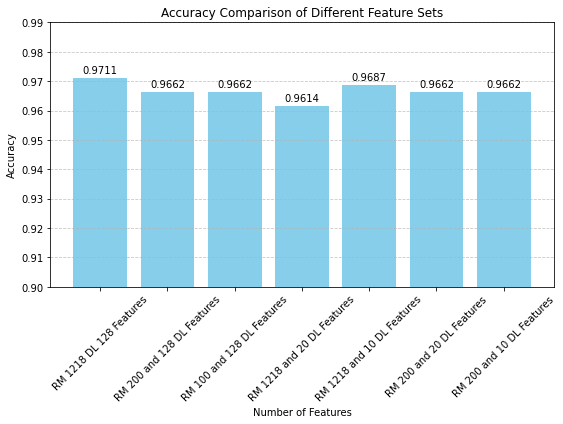

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
data = Final_accuracy

# Extract model names and corresponding accuracies for each scenario
# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(data.keys(), data.values(), color='skyblue')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Feature Sets')
plt.ylim(0.9, 0.99)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Input
import os
import datetime
import tensorflow as tf
import joblib
import SimpleITK as sitk
import numpy as np
from radiomics import featureextractor,imageoperations
import os
import pandas as pd
from pandas import DataFrame as DF
import warnings
import time
from time import sleep
from tqdm import tqdm
from skimage import measure

In [ ]:
Final_accuracy_test={}

In [ ]:
import datetime

# Get the current date
current_date = datetime.date.today()

# Format the date as a string in the desired format
current_date = current_date.strftime("%Y-%m-%d")
current_date

'2024-05-30'

In [ ]:
Data_Path= r'../Method -1/ROI_ny_files
error_file="Error_list_radiomics.txt"
Test_patients = [os.path.join(Data_Path,name) for name in os.listdir(Data_Path) if os.path.isdir(os.path.join(Data_Path, name))]
Test_patients = sorted(Test_patients)
Test_patients

['../../DataSet Files/Nodule_crop\\LIDC-IDRI-0001',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0002',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0003',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0004',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0005',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0006',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0007',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0008',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0010',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0011',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0012',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0013',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0014',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0016',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0018',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0020',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0021',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0023',
 '../../DataSet Files/Nodule_crop\\LIDC-IDRI-0024',
 '../../Data

In [ ]:
def Extract_Features(image,mask,params_path):
    paramsFile = os.path.abspath(params_path)
    extractor = featureextractor.RadiomicsFeatureExtractor(paramsFile)
    result = extractor.execute(image, mask)
    general_info = {'diagnostics_Configuration_EnabledImageTypes','diagnostics_Configuration_Settings',
                    'diagnostics_Image-interpolated_Maximum','diagnostics_Image-interpolated_Mean',
                    'diagnostics_Image-interpolated_Minimum','diagnostics_Image-interpolated_Size',
                    'diagnostics_Image-interpolated_Spacing','diagnostics_Image-original_Hash',
                    'diagnostics_Image-original_Maximum','diagnostics_Image-original_Mean',
                    'diagnostics_Image-original_Minimum','diagnostics_Image-original_Size',
                    'diagnostics_Image-original_Spacing','diagnostics_Mask-interpolated_BoundingBox',
                    'diagnostics_Mask-interpolated_CenterOfMass','diagnostics_Mask-interpolated_CenterOfMassIndex',
                    'diagnostics_Mask-interpolated_Maximum','diagnostics_Mask-interpolated_Mean',
                    'diagnostics_Mask-interpolated_Minimum','diagnostics_Mask-interpolated_Size',
                    'diagnostics_Mask-interpolated_Spacing','diagnostics_Mask-interpolated_VolumeNum',
                    'diagnostics_Mask-interpolated_VoxelNum','diagnostics_Mask-original_BoundingBox',
                    'diagnostics_Mask-original_CenterOfMass','diagnostics_Mask-original_CenterOfMassIndex',
                    'diagnostics_Mask-original_Hash','diagnostics_Mask-original_Size',
                    'diagnostics_Mask-original_Spacing','diagnostics_Mask-original_VolumeNum',
                    'diagnostics_Mask-original_VoxelNum','diagnostics_Versions_Numpy',
                    'diagnostics_Versions_PyRadiomics','diagnostics_Versions_PyWavelet',
                    'diagnostics_Versions_Python','diagnostics_Versions_SimpleITK',
                    'diagnostics_Image-original_Dimensionality'}
    features = dict((key, value) for key, value in result.items() if key not in general_info)
    feature_info = dict((key, value) for key, value in result.items() if key in general_info)
    return features,feature_info

In [ ]:
Feature = []
test_patients = [os.path.join(Data_Path,name) for name in os.listdir(Data_Path) if os.path.isdir(os.path.join(Data_Path, name))]
test_patients = sorted(test_patients)    
for patients in tqdm(test_patients):
        #sleep(0.01)
        print(patients[-14:])
        dcm_File = patients[-14:]
        count=(len([entry for entry in os.listdir(patients) if os.path.isfile(os.path.join(patients, entry))]))
        try:

            for i in range(1,int(count/2)+1):
                roi_path = Data_Path+'/'+dcm_File+"/"+dcm_File+'_'+str(i)+'_roi.npy'
                img=np.load(roi_path)
                ROI = sitk.GetImageFromArray(img)
            
                mask_path = Data_Path+'/'+dcm_File+"/"+dcm_File+'_'+str(i)+'_label.npy'
                msk=np.load(mask_path)
                Mask = sitk.GetImageFromArray(msk)
            
                features, feature_info = Extract_Features(ROI, Mask, 'params.yaml')
                features['Patient_id']=dcm_File+'_'+str(i)+'_roi.npy'
                Feature.append(features)
        except Exception as Error:
            with open('Error_list_radiomics.txt', 'a') as error_file:
                error_file.write(f"Error: {dcm_File}:{str(Error)}\n")
                print("Error: "+dcm_File+":"+str(Error)+"\n")
            continue
    
df = DF(Feature).fillna('0')
df.to_csv(f"RM_features_{current_date}_test_1.csv", index=False,sep=',')


  0%|          | 0/611 [00:00<?, ?it/s]

LIDC-IDRI-0001


  0%|          | 1/611 [00:00<07:41,  1.32it/s]

LIDC-IDRI-0002


  0%|          | 2/611 [00:01<07:05,  1.43it/s]

LIDC-IDRI-0003


  0%|          | 3/611 [00:03<11:33,  1.14s/it]

LIDC-IDRI-0004


  1%|          | 4/611 [00:03<08:52,  1.14it/s]

LIDC-IDRI-0005


  1%|          | 5/611 [00:04<08:58,  1.13it/s]

LIDC-IDRI-0006


  1%|          | 6/611 [00:05<09:03,  1.11it/s]

LIDC-IDRI-0007


  1%|          | 7/611 [00:06<08:42,  1.15it/s]

LIDC-IDRI-0008


  1%|▏         | 8/611 [00:07<08:50,  1.14it/s]

LIDC-IDRI-0010


  1%|▏         | 9/611 [00:08<09:03,  1.11it/s]

LIDC-IDRI-0011


  2%|▏         | 10/611 [00:11<16:22,  1.63s/it]

LIDC-IDRI-0012


  2%|▏         | 11/611 [00:16<28:05,  2.81s/it]

LIDC-IDRI-0013


  2%|▏         | 12/611 [00:18<24:52,  2.49s/it]

LIDC-IDRI-0014


  2%|▏         | 13/611 [00:19<18:57,  1.90s/it]

LIDC-IDRI-0016


  2%|▏         | 14/611 [00:21<20:38,  2.07s/it]

LIDC-IDRI-0018


  2%|▏         | 15/611 [00:23<20:11,  2.03s/it]

LIDC-IDRI-0020


  3%|▎         | 16/611 [00:24<15:36,  1.57s/it]

LIDC-IDRI-0021


  3%|▎         | 17/611 [00:24<12:35,  1.27s/it]

LIDC-IDRI-0023


  3%|▎         | 18/611 [00:25<10:54,  1.10s/it]

LIDC-IDRI-0024


  3%|▎         | 19/611 [00:27<13:05,  1.33s/it]

LIDC-IDRI-0026


  3%|▎         | 20/611 [00:27<10:33,  1.07s/it]

LIDC-IDRI-0027


  3%|▎         | 21/611 [00:30<15:39,  1.59s/it]

LIDC-IDRI-0030


  4%|▎         | 22/611 [00:31<13:51,  1.41s/it]

LIDC-IDRI-0034


  4%|▍         | 23/611 [00:31<11:03,  1.13s/it]

LIDC-IDRI-0035


  4%|▍         | 24/611 [00:32<09:05,  1.08it/s]

LIDC-IDRI-0036


  4%|▍         | 25/611 [00:32<07:46,  1.26it/s]

LIDC-IDRI-0037


  4%|▍         | 26/611 [00:33<08:12,  1.19it/s]

LIDC-IDRI-0039


  4%|▍         | 27/611 [00:36<12:44,  1.31s/it]

LIDC-IDRI-0040


  5%|▍         | 28/611 [00:36<10:14,  1.05s/it]

LIDC-IDRI-0041


  5%|▍         | 29/611 [00:37<10:07,  1.04s/it]

LIDC-IDRI-0042


  5%|▍         | 30/611 [00:40<15:57,  1.65s/it]

LIDC-IDRI-0043


  5%|▌         | 31/611 [00:42<15:42,  1.62s/it]

LIDC-IDRI-0044


  5%|▌         | 32/611 [00:43<15:46,  1.63s/it]

LIDC-IDRI-0046


  5%|▌         | 33/611 [00:46<18:41,  1.94s/it]

LIDC-IDRI-0047


  6%|▌         | 34/611 [00:47<14:38,  1.52s/it]

LIDC-IDRI-0048


  6%|▌         | 35/611 [00:48<14:39,  1.53s/it]

LIDC-IDRI-0049


  6%|▌         | 36/611 [00:54<28:11,  2.94s/it]

LIDC-IDRI-0050


  6%|▌         | 37/611 [00:55<21:45,  2.27s/it]

LIDC-IDRI-0051


  6%|▌         | 38/611 [00:56<18:01,  1.89s/it]

LIDC-IDRI-0052


  6%|▋         | 39/611 [00:57<15:26,  1.62s/it]

LIDC-IDRI-0054


  7%|▋         | 40/611 [00:58<12:22,  1.30s/it]

LIDC-IDRI-0055


  7%|▋         | 41/611 [01:01<17:28,  1.84s/it]

LIDC-IDRI-0057


  7%|▋         | 42/611 [01:01<14:06,  1.49s/it]

LIDC-IDRI-0058


  7%|▋         | 43/611 [01:03<14:37,  1.54s/it]

LIDC-IDRI-0059


  7%|▋         | 44/611 [01:04<11:37,  1.23s/it]

LIDC-IDRI-0060


  7%|▋         | 45/611 [01:06<15:22,  1.63s/it]

LIDC-IDRI-0061


  8%|▊         | 46/611 [01:09<18:55,  2.01s/it]

LIDC-IDRI-0063


  8%|▊         | 47/611 [01:10<17:11,  1.83s/it]

LIDC-IDRI-0065


  8%|▊         | 48/611 [01:11<13:16,  1.41s/it]

LIDC-IDRI-0066


  8%|▊         | 49/611 [01:12<13:36,  1.45s/it]

LIDC-IDRI-0067


  8%|▊         | 50/611 [01:14<14:48,  1.58s/it]

LIDC-IDRI-0068


  8%|▊         | 51/611 [01:17<18:00,  1.93s/it]

LIDC-IDRI-0070


  9%|▊         | 52/611 [01:19<16:59,  1.82s/it]

LIDC-IDRI-0073


  9%|▊         | 53/611 [01:20<14:59,  1.61s/it]

LIDC-IDRI-0074


  9%|▉         | 54/611 [01:20<12:03,  1.30s/it]

LIDC-IDRI-0075


  9%|▉         | 55/611 [01:22<11:58,  1.29s/it]

LIDC-IDRI-0076


  9%|▉         | 56/611 [01:23<10:58,  1.19s/it]

LIDC-IDRI-0077


  9%|▉         | 57/611 [01:23<09:26,  1.02s/it]

LIDC-IDRI-0080


  9%|▉         | 58/611 [01:25<11:37,  1.26s/it]

LIDC-IDRI-0081


 10%|▉         | 59/611 [01:26<11:08,  1.21s/it]

LIDC-IDRI-0082


 10%|▉         | 60/611 [01:27<09:22,  1.02s/it]

LIDC-IDRI-0085


 10%|▉         | 61/611 [01:27<07:58,  1.15it/s]

LIDC-IDRI-0086


 10%|█         | 62/611 [01:28<06:54,  1.33it/s]

LIDC-IDRI-0087


 10%|█         | 63/611 [01:28<06:34,  1.39it/s]

LIDC-IDRI-0088


 10%|█         | 64/611 [01:30<08:35,  1.06it/s]

LIDC-IDRI-0089


 11%|█         | 65/611 [01:31<08:08,  1.12it/s]

LIDC-IDRI-0090


 11%|█         | 66/611 [01:31<07:07,  1.28it/s]

LIDC-IDRI-0091


 11%|█         | 67/611 [01:34<11:57,  1.32s/it]

LIDC-IDRI-0092


 11%|█         | 68/611 [01:36<13:58,  1.54s/it]

LIDC-IDRI-0093


 11%|█▏        | 69/611 [01:36<11:12,  1.24s/it]

LIDC-IDRI-0094


 11%|█▏        | 70/611 [01:37<09:40,  1.07s/it]

LIDC-IDRI-0095


 12%|█▏        | 71/611 [01:38<10:46,  1.20s/it]

LIDC-IDRI-0096


 12%|█▏        | 72/611 [01:39<09:02,  1.01s/it]

LIDC-IDRI-0097


 12%|█▏        | 73/611 [01:40<07:39,  1.17it/s]

LIDC-IDRI-0099


 12%|█▏        | 74/611 [01:40<07:55,  1.13it/s]

LIDC-IDRI-0102


 12%|█▏        | 75/611 [01:41<06:57,  1.28it/s]

LIDC-IDRI-0104


 12%|█▏        | 76/611 [01:42<06:45,  1.32it/s]

LIDC-IDRI-0105


 13%|█▎        | 77/611 [01:42<06:07,  1.45it/s]

LIDC-IDRI-0107


 13%|█▎        | 78/611 [01:43<05:37,  1.58it/s]

LIDC-IDRI-0109


 13%|█▎        | 79/611 [01:43<05:23,  1.64it/s]

LIDC-IDRI-0110


 13%|█▎        | 80/611 [01:44<06:11,  1.43it/s]

LIDC-IDRI-0112


 13%|█▎        | 81/611 [01:45<05:39,  1.56it/s]

LIDC-IDRI-0113


 13%|█▎        | 82/611 [01:45<05:16,  1.67it/s]

LIDC-IDRI-0114


 14%|█▎        | 83/611 [01:46<04:56,  1.78it/s]

LIDC-IDRI-0116


 14%|█▎        | 84/611 [01:46<05:07,  1.71it/s]

LIDC-IDRI-0118


 14%|█▍        | 85/611 [01:49<10:03,  1.15s/it]

LIDC-IDRI-0121


 14%|█▍        | 86/611 [01:50<09:37,  1.10s/it]

LIDC-IDRI-0123


 14%|█▍        | 87/611 [01:50<07:57,  1.10it/s]

LIDC-IDRI-0124


 14%|█▍        | 88/611 [01:55<17:37,  2.02s/it]

LIDC-IDRI-0125


 15%|█▍        | 89/611 [01:56<14:50,  1.71s/it]

LIDC-IDRI-0128


 15%|█▍        | 90/611 [01:57<12:44,  1.47s/it]

LIDC-IDRI-0131


 15%|█▍        | 91/611 [01:57<10:06,  1.17s/it]

LIDC-IDRI-0132


 15%|█▌        | 92/611 [02:00<13:45,  1.59s/it]

LIDC-IDRI-0133


 15%|█▌        | 93/611 [02:01<12:04,  1.40s/it]

LIDC-IDRI-0135


 15%|█▌        | 94/611 [02:04<15:51,  1.84s/it]

LIDC-IDRI-0137


 16%|█▌        | 95/611 [02:06<16:10,  1.88s/it]

LIDC-IDRI-0139


 16%|█▌        | 96/611 [02:08<17:55,  2.09s/it]

LIDC-IDRI-0142


 16%|█▌        | 97/611 [02:10<17:06,  2.00s/it]

LIDC-IDRI-0144


 16%|█▌        | 98/611 [02:12<16:41,  1.95s/it]

LIDC-IDRI-0145


 16%|█▌        | 99/611 [02:12<13:06,  1.54s/it]

LIDC-IDRI-0146


 16%|█▋        | 100/611 [02:13<10:26,  1.23s/it]

LIDC-IDRI-0148


 17%|█▋        | 101/611 [02:14<10:13,  1.20s/it]

LIDC-IDRI-0151


 17%|█▋        | 102/611 [02:14<08:20,  1.02it/s]

LIDC-IDRI-0155


 17%|█▋        | 103/611 [02:15<06:57,  1.22it/s]

LIDC-IDRI-0156


 17%|█▋        | 104/611 [02:15<06:02,  1.40it/s]

LIDC-IDRI-0157


 17%|█▋        | 105/611 [02:16<05:19,  1.59it/s]

LIDC-IDRI-0159


 17%|█▋        | 106/611 [02:17<06:12,  1.36it/s]

LIDC-IDRI-0160


 18%|█▊        | 107/611 [02:19<09:12,  1.10s/it]

LIDC-IDRI-0161


 18%|█▊        | 108/611 [02:20<10:05,  1.20s/it]

LIDC-IDRI-0162


 18%|█▊        | 109/611 [02:21<08:11,  1.02it/s]

LIDC-IDRI-0163


 18%|█▊        | 110/611 [02:21<07:14,  1.15it/s]

LIDC-IDRI-0166


 18%|█▊        | 111/611 [02:22<07:03,  1.18it/s]

LIDC-IDRI-0167


 18%|█▊        | 112/611 [02:23<08:10,  1.02it/s]

LIDC-IDRI-0168


 18%|█▊        | 113/611 [02:24<07:51,  1.06it/s]

LIDC-IDRI-0169


 19%|█▊        | 114/611 [02:26<08:48,  1.06s/it]

LIDC-IDRI-0170


 19%|█▉        | 115/611 [02:27<09:04,  1.10s/it]

LIDC-IDRI-0172


 19%|█▉        | 116/611 [02:27<07:42,  1.07it/s]

LIDC-IDRI-0175


 19%|█▉        | 117/611 [02:28<06:30,  1.26it/s]

LIDC-IDRI-0176


 19%|█▉        | 118/611 [02:29<06:40,  1.23it/s]

LIDC-IDRI-0178


 19%|█▉        | 119/611 [02:29<05:45,  1.42it/s]

LIDC-IDRI-0179


 20%|█▉        | 120/611 [02:32<10:37,  1.30s/it]

LIDC-IDRI-0181


 20%|█▉        | 121/611 [02:36<16:45,  2.05s/it]

LIDC-IDRI-0182


 20%|█▉        | 122/611 [02:36<13:51,  1.70s/it]

LIDC-IDRI-0183


 20%|██        | 123/611 [02:37<12:04,  1.48s/it]

LIDC-IDRI-0184


 20%|██        | 124/611 [02:38<09:34,  1.18s/it]

LIDC-IDRI-0185


 20%|██        | 125/611 [02:41<13:19,  1.64s/it]

LIDC-IDRI-0186


 21%|██        | 126/611 [02:43<14:16,  1.77s/it]

LIDC-IDRI-0187


 21%|██        | 127/611 [02:44<12:28,  1.55s/it]

LIDC-IDRI-0188


 21%|██        | 128/611 [02:47<16:23,  2.04s/it]

LIDC-IDRI-0190


 21%|██        | 129/611 [02:48<14:08,  1.76s/it]

LIDC-IDRI-0191


 21%|██▏       | 130/611 [02:49<11:38,  1.45s/it]

LIDC-IDRI-0192


 21%|██▏       | 131/611 [02:50<11:39,  1.46s/it]

LIDC-IDRI-0193


 22%|██▏       | 132/611 [02:51<09:14,  1.16s/it]

LIDC-IDRI-0194


 22%|██▏       | 133/611 [02:53<11:28,  1.44s/it]

LIDC-IDRI-0196


 22%|██▏       | 134/611 [02:53<09:10,  1.15s/it]

LIDC-IDRI-0198


 22%|██▏       | 135/611 [02:54<07:27,  1.06it/s]

LIDC-IDRI-0199


 22%|██▏       | 136/611 [02:55<07:19,  1.08it/s]

LIDC-IDRI-0200


 22%|██▏       | 137/611 [02:55<06:08,  1.29it/s]

LIDC-IDRI-0201


 23%|██▎       | 138/611 [02:56<07:28,  1.05it/s]

LIDC-IDRI-0202


 23%|██▎       | 139/611 [02:57<06:14,  1.26it/s]

LIDC-IDRI-0203


 23%|██▎       | 140/611 [02:58<06:57,  1.13it/s]

LIDC-IDRI-0204


 23%|██▎       | 141/611 [02:58<06:12,  1.26it/s]

LIDC-IDRI-0206


 23%|██▎       | 142/611 [03:00<07:27,  1.05it/s]

LIDC-IDRI-0208


 23%|██▎       | 143/611 [03:01<08:30,  1.09s/it]

LIDC-IDRI-0210


 24%|██▎       | 144/611 [03:02<07:01,  1.11it/s]

LIDC-IDRI-0213


 24%|██▎       | 145/611 [03:02<05:57,  1.30it/s]c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\radiomics\glcm.py:599: RuntimeWarning: invalid value encountered in sqrt
  imc2 = (1 - numpy.e ** (-2 * (HXY2 - HXY))) ** 0.5


LIDC-IDRI-0215


 24%|██▍       | 146/611 [03:04<08:25,  1.09s/it]

LIDC-IDRI-0216


 24%|██▍       | 147/611 [03:05<07:56,  1.03s/it]

LIDC-IDRI-0217


 24%|██▍       | 148/611 [03:06<08:48,  1.14s/it]

LIDC-IDRI-0219


 24%|██▍       | 149/611 [03:07<07:12,  1.07it/s]

LIDC-IDRI-0221


 25%|██▍       | 150/611 [03:07<06:27,  1.19it/s]

LIDC-IDRI-0222


 25%|██▍       | 151/611 [03:08<05:31,  1.39it/s]

LIDC-IDRI-0223


 25%|██▍       | 152/611 [03:09<06:09,  1.24it/s]

LIDC-IDRI-0227


 25%|██▌       | 153/611 [03:09<05:20,  1.43it/s]

LIDC-IDRI-0228


 25%|██▌       | 154/611 [03:10<04:47,  1.59it/s]

LIDC-IDRI-0229


 25%|██▌       | 155/611 [03:13<10:47,  1.42s/it]

LIDC-IDRI-0230


 26%|██▌       | 156/611 [03:14<09:33,  1.26s/it]

LIDC-IDRI-0232


 26%|██▌       | 157/611 [03:14<07:40,  1.02s/it]

LIDC-IDRI-0233


 26%|██▌       | 158/611 [03:15<07:21,  1.02it/s]

LIDC-IDRI-0237


 26%|██▌       | 159/611 [03:17<08:23,  1.11s/it]

LIDC-IDRI-0240


 26%|██▌       | 160/611 [03:18<08:18,  1.10s/it]

LIDC-IDRI-0241


 26%|██▋       | 161/611 [03:19<08:54,  1.19s/it]

LIDC-IDRI-0242


 27%|██▋       | 162/611 [03:20<07:34,  1.01s/it]

LIDC-IDRI-0244


 27%|██▋       | 163/611 [03:21<08:34,  1.15s/it]

LIDC-IDRI-0245


 27%|██▋       | 164/611 [03:22<06:56,  1.07it/s]

LIDC-IDRI-0246


 27%|██▋       | 165/611 [03:22<05:55,  1.26it/s]

LIDC-IDRI-0248


 27%|██▋       | 166/611 [03:22<05:04,  1.46it/s]

LIDC-IDRI-0249


 27%|██▋       | 167/611 [03:23<05:43,  1.29it/s]

LIDC-IDRI-0251


 27%|██▋       | 168/611 [03:24<04:57,  1.49it/s]

LIDC-IDRI-0252


 28%|██▊       | 169/611 [03:24<04:40,  1.57it/s]

LIDC-IDRI-0254


 28%|██▊       | 170/611 [03:26<06:09,  1.19it/s]

LIDC-IDRI-0255


 28%|██▊       | 171/611 [03:27<06:14,  1.17it/s]

LIDC-IDRI-0256


 28%|██▊       | 172/611 [03:27<05:22,  1.36it/s]

LIDC-IDRI-0257


 28%|██▊       | 173/611 [03:28<04:56,  1.47it/s]

LIDC-IDRI-0258


 28%|██▊       | 174/611 [03:29<05:38,  1.29it/s]

LIDC-IDRI-0259


 29%|██▊       | 175/611 [03:29<04:54,  1.48it/s]

LIDC-IDRI-0260


 29%|██▉       | 176/611 [03:31<07:52,  1.09s/it]

LIDC-IDRI-0263


 29%|██▉       | 177/611 [03:32<06:34,  1.10it/s]

LIDC-IDRI-0264


 29%|██▉       | 178/611 [03:33<06:35,  1.10it/s]

LIDC-IDRI-0265


 29%|██▉       | 179/611 [03:33<05:56,  1.21it/s]

LIDC-IDRI-0267


 29%|██▉       | 180/611 [03:35<07:09,  1.00it/s]

LIDC-IDRI-0269


 30%|██▉       | 181/611 [03:35<05:59,  1.20it/s]

LIDC-IDRI-0271


 30%|██▉       | 182/611 [03:35<05:08,  1.39it/s]

LIDC-IDRI-0272


 30%|██▉       | 183/611 [03:36<04:32,  1.57it/s]

LIDC-IDRI-0274


 30%|███       | 184/611 [03:36<04:13,  1.69it/s]

LIDC-IDRI-0276


 30%|███       | 185/611 [03:37<03:53,  1.83it/s]

LIDC-IDRI-0277


 30%|███       | 186/611 [03:37<04:05,  1.73it/s]

LIDC-IDRI-0281


 31%|███       | 187/611 [03:38<03:49,  1.85it/s]

LIDC-IDRI-0283


 31%|███       | 188/611 [03:38<03:37,  1.94it/s]

LIDC-IDRI-0284


 31%|███       | 189/611 [03:39<04:22,  1.61it/s]

LIDC-IDRI-0285


 31%|███       | 190/611 [03:40<05:11,  1.35it/s]

LIDC-IDRI-0288


 31%|███▏      | 191/611 [03:41<05:28,  1.28it/s]

LIDC-IDRI-0289


 31%|███▏      | 192/611 [03:42<06:12,  1.12it/s]

LIDC-IDRI-0291


 32%|███▏      | 193/611 [03:43<05:16,  1.32it/s]

LIDC-IDRI-0292


 32%|███▏      | 194/611 [03:43<04:44,  1.47it/s]

LIDC-IDRI-0294


 32%|███▏      | 195/611 [03:44<04:34,  1.52it/s]

LIDC-IDRI-0297


 32%|███▏      | 196/611 [03:44<04:08,  1.67it/s]

LIDC-IDRI-0298


 32%|███▏      | 197/611 [03:48<10:50,  1.57s/it]

LIDC-IDRI-0299


 32%|███▏      | 198/611 [03:50<10:29,  1.52s/it]

LIDC-IDRI-0300


 33%|███▎      | 199/611 [03:51<11:01,  1.61s/it]

LIDC-IDRI-0301


 33%|███▎      | 200/611 [03:52<09:35,  1.40s/it]

LIDC-IDRI-0304


 33%|███▎      | 201/611 [03:53<07:39,  1.12s/it]

LIDC-IDRI-0308


 33%|███▎      | 202/611 [03:53<06:18,  1.08it/s]

LIDC-IDRI-0309


 33%|███▎      | 203/611 [03:54<05:18,  1.28it/s]

LIDC-IDRI-0310


 33%|███▎      | 204/611 [03:54<04:39,  1.46it/s]

LIDC-IDRI-0311


 34%|███▎      | 205/611 [03:55<05:35,  1.21it/s]

LIDC-IDRI-0314


 34%|███▎      | 206/611 [03:56<04:58,  1.36it/s]

LIDC-IDRI-0315


 34%|███▍      | 207/611 [03:58<08:27,  1.26s/it]

LIDC-IDRI-0317


 34%|███▍      | 208/611 [03:59<06:46,  1.01s/it]

LIDC-IDRI-0318


 34%|███▍      | 209/611 [03:59<05:36,  1.20it/s]

LIDC-IDRI-0319


 34%|███▍      | 210/611 [04:00<04:47,  1.40it/s]

LIDC-IDRI-0324


 35%|███▍      | 211/611 [04:00<04:13,  1.58it/s]

LIDC-IDRI-0325


 35%|███▍      | 212/611 [04:01<04:14,  1.57it/s]

LIDC-IDRI-0329


 35%|███▍      | 213/611 [04:01<03:50,  1.73it/s]

LIDC-IDRI-0332


 35%|███▌      | 214/611 [04:03<05:43,  1.15it/s]

LIDC-IDRI-0334


 35%|███▌      | 215/611 [04:06<10:42,  1.62s/it]

LIDC-IDRI-0335


 35%|███▌      | 216/611 [04:08<11:07,  1.69s/it]

LIDC-IDRI-0337


 36%|███▌      | 217/611 [04:09<10:07,  1.54s/it]

LIDC-IDRI-0338


 36%|███▌      | 218/611 [04:10<07:55,  1.21s/it]

LIDC-IDRI-0339


 36%|███▌      | 219/611 [04:10<06:23,  1.02it/s]

LIDC-IDRI-0343


 36%|███▌      | 220/611 [04:10<05:20,  1.22it/s]

LIDC-IDRI-0344


 36%|███▌      | 221/611 [04:11<05:28,  1.19it/s]

LIDC-IDRI-0345


 36%|███▋      | 222/611 [04:12<05:31,  1.17it/s]

LIDC-IDRI-0346


 36%|███▋      | 223/611 [04:14<08:20,  1.29s/it]

LIDC-IDRI-0347


 37%|███▋      | 224/611 [04:16<09:06,  1.41s/it]

LIDC-IDRI-0348


 37%|███▋      | 225/611 [04:17<07:19,  1.14s/it]

LIDC-IDRI-0351


 37%|███▋      | 226/611 [04:17<05:58,  1.07it/s]

LIDC-IDRI-0352


 37%|███▋      | 227/611 [04:18<05:15,  1.22it/s]

LIDC-IDRI-0353


 37%|███▋      | 228/611 [04:19<06:23,  1.00s/it]

LIDC-IDRI-0354


 37%|███▋      | 229/611 [04:20<06:10,  1.03it/s]

LIDC-IDRI-0355


 38%|███▊      | 230/611 [04:21<05:25,  1.17it/s]

LIDC-IDRI-0356


 38%|███▊      | 231/611 [04:24<09:43,  1.53s/it]

LIDC-IDRI-0358


 38%|███▊      | 232/611 [04:26<11:06,  1.76s/it]

LIDC-IDRI-0360


 38%|███▊      | 233/611 [04:28<11:10,  1.77s/it]

LIDC-IDRI-0362


 38%|███▊      | 234/611 [04:28<08:42,  1.39s/it]

LIDC-IDRI-0365


 38%|███▊      | 235/611 [04:29<07:03,  1.13s/it]

LIDC-IDRI-0366


 39%|███▊      | 236/611 [04:29<06:03,  1.03it/s]

LIDC-IDRI-0369


 39%|███▉      | 237/611 [04:30<05:03,  1.23it/s]

LIDC-IDRI-0371


 39%|███▉      | 238/611 [04:30<04:25,  1.40it/s]

LIDC-IDRI-0375


 39%|███▉      | 239/611 [04:31<04:49,  1.28it/s]

LIDC-IDRI-0376


 39%|███▉      | 240/611 [04:32<04:58,  1.24it/s]

LIDC-IDRI-0377


 39%|███▉      | 241/611 [04:33<05:21,  1.15it/s]

LIDC-IDRI-0378


 40%|███▉      | 242/611 [04:34<04:35,  1.34it/s]

LIDC-IDRI-0379


 40%|███▉      | 243/611 [04:35<06:33,  1.07s/it]

LIDC-IDRI-0380


 40%|███▉      | 244/611 [04:37<06:59,  1.14s/it]

LIDC-IDRI-0381


 40%|████      | 245/611 [04:37<05:41,  1.07it/s]

LIDC-IDRI-0384


 40%|████      | 246/611 [04:38<04:46,  1.27it/s]

LIDC-IDRI-0385


 40%|████      | 247/611 [04:38<04:11,  1.45it/s]

LIDC-IDRI-0386


 41%|████      | 248/611 [04:40<06:16,  1.04s/it]

LIDC-IDRI-0387


 41%|████      | 249/611 [04:41<06:21,  1.06s/it]

LIDC-IDRI-0388


 41%|████      | 250/611 [04:42<06:50,  1.14s/it]

LIDC-IDRI-0390


 41%|████      | 251/611 [04:46<10:35,  1.77s/it]

LIDC-IDRI-0392


 41%|████      | 252/611 [04:46<08:57,  1.50s/it]

LIDC-IDRI-0394


 41%|████▏     | 253/611 [04:50<11:58,  2.01s/it]

LIDC-IDRI-0395


 42%|████▏     | 254/611 [04:51<10:58,  1.84s/it]

LIDC-IDRI-0397


 42%|████▏     | 255/611 [04:52<08:25,  1.42s/it]

LIDC-IDRI-0398


 42%|████▏     | 256/611 [04:54<09:47,  1.65s/it]

LIDC-IDRI-0399


 42%|████▏     | 257/611 [04:54<07:35,  1.29s/it]

LIDC-IDRI-0405


 42%|████▏     | 258/611 [04:56<07:46,  1.32s/it]

LIDC-IDRI-0406


 42%|████▏     | 259/611 [04:56<06:57,  1.18s/it]

LIDC-IDRI-0409


 43%|████▎     | 260/611 [04:58<07:14,  1.24s/it]

LIDC-IDRI-0411


 43%|████▎     | 261/611 [04:59<06:34,  1.13s/it]

LIDC-IDRI-0412


 43%|████▎     | 262/611 [05:00<06:53,  1.18s/it]

LIDC-IDRI-0413


 43%|████▎     | 263/611 [05:01<06:24,  1.10s/it]

LIDC-IDRI-0414


 43%|████▎     | 264/611 [05:01<05:18,  1.09it/s]

LIDC-IDRI-0416


 43%|████▎     | 265/611 [05:02<05:13,  1.10it/s]

LIDC-IDRI-0420


 44%|████▎     | 266/611 [05:03<05:10,  1.11it/s]

LIDC-IDRI-0421


 44%|████▎     | 267/611 [05:04<05:26,  1.05it/s]

LIDC-IDRI-0423


 44%|████▍     | 268/611 [05:05<04:45,  1.20it/s]

LIDC-IDRI-0424


 44%|████▍     | 269/611 [05:06<04:48,  1.18it/s]

LIDC-IDRI-0427


 44%|████▍     | 270/611 [05:07<06:25,  1.13s/it]

LIDC-IDRI-0429


 44%|████▍     | 271/611 [05:08<05:59,  1.06s/it]

LIDC-IDRI-0430


 45%|████▍     | 272/611 [05:09<05:43,  1.01s/it]

LIDC-IDRI-0433


 45%|████▍     | 273/611 [05:11<06:54,  1.23s/it]

LIDC-IDRI-0434


 45%|████▍     | 274/611 [05:13<07:22,  1.31s/it]

LIDC-IDRI-0437


 45%|████▌     | 275/611 [05:14<08:16,  1.48s/it]

LIDC-IDRI-0438


 45%|████▌     | 276/611 [05:15<06:31,  1.17s/it]

LIDC-IDRI-0439


 45%|████▌     | 277/611 [05:16<06:13,  1.12s/it]

LIDC-IDRI-0440


 45%|████▌     | 278/611 [05:17<05:50,  1.05s/it]

LIDC-IDRI-0442


 46%|████▌     | 279/611 [05:18<06:24,  1.16s/it]

LIDC-IDRI-0443


 46%|████▌     | 280/611 [05:19<05:58,  1.08s/it]

LIDC-IDRI-0444


 46%|████▌     | 281/611 [05:19<04:55,  1.12it/s]

LIDC-IDRI-0445


 46%|████▌     | 282/611 [05:20<04:09,  1.32it/s]

LIDC-IDRI-0448


 46%|████▋     | 283/611 [05:21<05:12,  1.05it/s]

LIDC-IDRI-0449


 46%|████▋     | 284/611 [05:22<05:06,  1.07it/s]

LIDC-IDRI-0451


 47%|████▋     | 285/611 [05:23<04:19,  1.26it/s]

LIDC-IDRI-0452


 47%|████▋     | 286/611 [05:24<04:28,  1.21it/s]

LIDC-IDRI-0453


 47%|████▋     | 287/611 [05:24<03:49,  1.41it/s]

LIDC-IDRI-0456


 47%|████▋     | 288/611 [05:25<04:52,  1.10it/s]

LIDC-IDRI-0458


 47%|████▋     | 289/611 [05:26<04:49,  1.11it/s]

LIDC-IDRI-0460


 47%|████▋     | 290/611 [05:27<04:50,  1.11it/s]

LIDC-IDRI-0462


 48%|████▊     | 291/611 [05:29<05:49,  1.09s/it]

LIDC-IDRI-0463


 48%|████▊     | 292/611 [05:30<05:30,  1.04s/it]

LIDC-IDRI-0466


 48%|████▊     | 293/611 [05:31<06:11,  1.17s/it]

LIDC-IDRI-0467


 48%|████▊     | 294/611 [05:32<05:00,  1.06it/s]

LIDC-IDRI-0468


 48%|████▊     | 295/611 [05:32<04:12,  1.25it/s]

LIDC-IDRI-0469


 48%|████▊     | 296/611 [05:34<05:50,  1.11s/it]

LIDC-IDRI-0474


 49%|████▊     | 297/611 [05:36<07:42,  1.47s/it]

LIDC-IDRI-0475


 49%|████▉     | 298/611 [05:37<06:05,  1.17s/it]

LIDC-IDRI-0478


 49%|████▉     | 299/611 [05:37<05:01,  1.04it/s]

LIDC-IDRI-0479


 49%|████▉     | 300/611 [05:38<04:51,  1.07it/s]

LIDC-IDRI-0480


 49%|████▉     | 301/611 [05:38<04:04,  1.27it/s]

LIDC-IDRI-0481


 49%|████▉     | 302/611 [05:42<08:01,  1.56s/it]

LIDC-IDRI-0484


 50%|████▉     | 303/611 [05:42<06:24,  1.25s/it]

LIDC-IDRI-0486


 50%|████▉     | 304/611 [05:43<05:48,  1.14s/it]

LIDC-IDRI-0487


 50%|████▉     | 305/611 [05:44<05:22,  1.05s/it]

LIDC-IDRI-0489


 50%|█████     | 306/611 [05:47<08:04,  1.59s/it]

LIDC-IDRI-0490


 50%|█████     | 307/611 [05:48<07:03,  1.39s/it]

LIDC-IDRI-0492


 50%|█████     | 308/611 [05:50<07:54,  1.57s/it]

LIDC-IDRI-0493


 51%|█████     | 309/611 [05:51<07:13,  1.43s/it]

LIDC-IDRI-0498


 51%|█████     | 310/611 [05:51<05:42,  1.14s/it]

LIDC-IDRI-0499


 51%|█████     | 311/611 [05:54<07:54,  1.58s/it]

LIDC-IDRI-0500


 51%|█████     | 312/611 [05:54<06:11,  1.24s/it]

LIDC-IDRI-0503


 51%|█████     | 313/611 [05:55<05:00,  1.01s/it]

LIDC-IDRI-0504


 51%|█████▏    | 314/611 [05:55<04:12,  1.18it/s]

LIDC-IDRI-0507


 52%|█████▏    | 315/611 [05:57<05:30,  1.12s/it]

LIDC-IDRI-0509


 52%|█████▏    | 316/611 [05:59<06:26,  1.31s/it]

LIDC-IDRI-0510


 52%|█████▏    | 317/611 [06:02<09:05,  1.86s/it]

LIDC-IDRI-0515


 52%|█████▏    | 318/611 [06:03<07:06,  1.46s/it]

LIDC-IDRI-0518


 52%|█████▏    | 319/611 [06:04<07:02,  1.45s/it]

LIDC-IDRI-0521


 52%|█████▏    | 320/611 [06:04<05:40,  1.17s/it]

LIDC-IDRI-0522


 53%|█████▎    | 321/611 [06:05<04:36,  1.05it/s]

LIDC-IDRI-0525


 53%|█████▎    | 322/611 [06:06<04:29,  1.07it/s]

LIDC-IDRI-0526


 53%|█████▎    | 323/611 [06:09<07:18,  1.52s/it]

LIDC-IDRI-0527


 53%|█████▎    | 324/611 [06:09<05:46,  1.21s/it]

LIDC-IDRI-0529


 53%|█████▎    | 325/611 [06:10<05:15,  1.10s/it]

LIDC-IDRI-0530


 53%|█████▎    | 326/611 [06:11<04:55,  1.04s/it]

LIDC-IDRI-0532


 54%|█████▎    | 327/611 [06:11<04:04,  1.16it/s]

LIDC-IDRI-0533


 54%|█████▎    | 328/611 [06:12<03:29,  1.35it/s]

LIDC-IDRI-0534


 54%|█████▍    | 329/611 [06:13<03:56,  1.19it/s]

LIDC-IDRI-0535


 54%|█████▍    | 330/611 [06:14<04:44,  1.01s/it]

LIDC-IDRI-0537


 54%|█████▍    | 331/611 [06:15<03:54,  1.19it/s]

LIDC-IDRI-0538


 54%|█████▍    | 332/611 [06:15<03:21,  1.39it/s]

LIDC-IDRI-0541


 55%|█████▍    | 333/611 [06:16<03:34,  1.30it/s]

LIDC-IDRI-0542


 55%|█████▍    | 334/611 [06:17<03:41,  1.25it/s]

LIDC-IDRI-0543


 55%|█████▍    | 335/611 [06:18<04:07,  1.11it/s]

LIDC-IDRI-0546


 55%|█████▍    | 336/611 [06:19<03:40,  1.25it/s]

LIDC-IDRI-0547


 55%|█████▌    | 337/611 [06:20<03:45,  1.21it/s]

LIDC-IDRI-0552


 55%|█████▌    | 338/611 [06:20<03:16,  1.39it/s]

LIDC-IDRI-0553


 55%|█████▌    | 339/611 [06:21<03:30,  1.29it/s]

LIDC-IDRI-0555


 56%|█████▌    | 340/611 [06:21<03:06,  1.46it/s]

LIDC-IDRI-0557


 56%|█████▌    | 341/611 [06:22<02:46,  1.62it/s]

LIDC-IDRI-0558


 56%|█████▌    | 342/611 [06:22<02:32,  1.77it/s]

LIDC-IDRI-0559


 56%|█████▌    | 343/611 [06:23<02:55,  1.52it/s]

LIDC-IDRI-0562


 56%|█████▋    | 344/611 [06:24<03:14,  1.37it/s]

LIDC-IDRI-0565


 56%|█████▋    | 345/611 [06:26<05:25,  1.22s/it]

LIDC-IDRI-0567


 57%|█████▋    | 346/611 [06:27<04:53,  1.11s/it]

LIDC-IDRI-0568


 57%|█████▋    | 347/611 [06:29<05:20,  1.22s/it]

LIDC-IDRI-0571


 57%|█████▋    | 348/611 [06:29<04:18,  1.02it/s]

LIDC-IDRI-0572


 57%|█████▋    | 349/611 [06:30<03:35,  1.22it/s]

LIDC-IDRI-0574


 57%|█████▋    | 350/611 [06:30<03:04,  1.41it/s]

LIDC-IDRI-0576


 57%|█████▋    | 351/611 [06:32<04:47,  1.11s/it]

LIDC-IDRI-0577


 58%|█████▊    | 352/611 [06:34<05:35,  1.29s/it]

LIDC-IDRI-0578


 58%|█████▊    | 353/611 [06:34<04:30,  1.05s/it]

LIDC-IDRI-0579


 58%|█████▊    | 354/611 [06:35<03:51,  1.11it/s]

LIDC-IDRI-0580


 58%|█████▊    | 355/611 [06:35<03:15,  1.31it/s]

LIDC-IDRI-0582


 58%|█████▊    | 356/611 [06:38<06:12,  1.46s/it]

LIDC-IDRI-0583


 58%|█████▊    | 357/611 [06:43<09:58,  2.36s/it]

LIDC-IDRI-0586


 59%|█████▊    | 358/611 [06:44<08:05,  1.92s/it]

LIDC-IDRI-0587


 59%|█████▉    | 359/611 [06:47<09:30,  2.26s/it]

LIDC-IDRI-0590


 59%|█████▉    | 360/611 [06:47<07:12,  1.72s/it]

LIDC-IDRI-0591


 59%|█████▉    | 361/611 [06:48<05:35,  1.34s/it]

LIDC-IDRI-0592


 59%|█████▉    | 362/611 [06:48<04:27,  1.07s/it]

LIDC-IDRI-0594


 59%|█████▉    | 363/611 [06:49<04:29,  1.09s/it]

LIDC-IDRI-0595


 60%|█████▉    | 364/611 [06:50<03:53,  1.06it/s]

LIDC-IDRI-0596


 60%|█████▉    | 365/611 [06:51<03:48,  1.07it/s]

LIDC-IDRI-0601


 60%|█████▉    | 366/611 [06:53<05:38,  1.38s/it]

LIDC-IDRI-0602


 60%|██████    | 367/611 [06:54<05:20,  1.31s/it]

LIDC-IDRI-0604


 60%|██████    | 368/611 [06:57<06:34,  1.62s/it]

LIDC-IDRI-0605


 60%|██████    | 369/611 [07:00<08:28,  2.10s/it]

LIDC-IDRI-0606


 61%|██████    | 370/611 [07:01<06:37,  1.65s/it]

LIDC-IDRI-0607


 61%|██████    | 371/611 [07:01<05:16,  1.32s/it]

LIDC-IDRI-0608


 61%|██████    | 372/611 [07:03<05:56,  1.49s/it]

LIDC-IDRI-0609


 61%|██████    | 373/611 [07:03<04:43,  1.19s/it]

LIDC-IDRI-0613


 61%|██████    | 374/611 [07:04<03:49,  1.03it/s]

LIDC-IDRI-0614


 61%|██████▏   | 375/611 [07:05<04:29,  1.14s/it]

LIDC-IDRI-0615


 62%|██████▏   | 376/611 [07:07<04:42,  1.20s/it]

LIDC-IDRI-0617


 62%|██████▏   | 377/611 [07:08<04:21,  1.12s/it]

LIDC-IDRI-0618


 62%|██████▏   | 378/611 [07:08<03:35,  1.08it/s]

LIDC-IDRI-0619


 62%|██████▏   | 379/611 [07:09<03:45,  1.03it/s]

LIDC-IDRI-0620


 62%|██████▏   | 380/611 [07:11<04:46,  1.24s/it]

LIDC-IDRI-0624


 62%|██████▏   | 381/611 [07:13<04:55,  1.28s/it]

LIDC-IDRI-0625


 63%|██████▎   | 382/611 [07:13<03:57,  1.04s/it]

LIDC-IDRI-0626


 63%|██████▎   | 383/611 [07:13<03:17,  1.15it/s]

LIDC-IDRI-0628


 63%|██████▎   | 384/611 [07:15<03:51,  1.02s/it]

LIDC-IDRI-0631


 63%|██████▎   | 385/611 [07:15<03:10,  1.18it/s]

LIDC-IDRI-0634


 63%|██████▎   | 386/611 [07:16<02:44,  1.37it/s]

LIDC-IDRI-0635


 63%|██████▎   | 387/611 [07:16<02:27,  1.52it/s]

LIDC-IDRI-0636


 64%|██████▎   | 388/611 [07:19<04:25,  1.19s/it]

LIDC-IDRI-0638


 64%|██████▎   | 389/611 [07:19<03:35,  1.03it/s]

LIDC-IDRI-0639


 64%|██████▍   | 390/611 [07:20<03:27,  1.06it/s]

LIDC-IDRI-0640


 64%|██████▍   | 391/611 [07:21<03:27,  1.06it/s]

LIDC-IDRI-0641


 64%|██████▍   | 392/611 [07:24<05:21,  1.47s/it]

LIDC-IDRI-0642


 64%|██████▍   | 393/611 [07:25<05:43,  1.58s/it]

LIDC-IDRI-0643


 64%|██████▍   | 394/611 [07:26<04:29,  1.24s/it]

LIDC-IDRI-0644


 65%|██████▍   | 395/611 [07:26<03:37,  1.00s/it]

LIDC-IDRI-0645


 65%|██████▍   | 396/611 [07:27<02:59,  1.20it/s]

LIDC-IDRI-0647


 65%|██████▍   | 397/611 [07:27<02:33,  1.40it/s]

LIDC-IDRI-0648


 65%|██████▌   | 398/611 [07:28<02:43,  1.31it/s]

LIDC-IDRI-0652


 65%|██████▌   | 399/611 [07:29<02:21,  1.50it/s]

LIDC-IDRI-0654


 65%|██████▌   | 400/611 [07:29<02:06,  1.67it/s]

LIDC-IDRI-0657


 66%|██████▌   | 401/611 [07:29<01:57,  1.79it/s]

LIDC-IDRI-0658


 66%|██████▌   | 402/611 [07:30<01:49,  1.90it/s]

LIDC-IDRI-0659


 66%|██████▌   | 403/611 [07:30<01:44,  2.00it/s]

LIDC-IDRI-0661


 66%|██████▌   | 404/611 [07:32<03:04,  1.12it/s]

LIDC-IDRI-0663


 66%|██████▋   | 405/611 [07:34<03:30,  1.02s/it]

LIDC-IDRI-0666


 66%|██████▋   | 406/611 [07:34<02:55,  1.17it/s]

LIDC-IDRI-0669


 67%|██████▋   | 407/611 [07:34<02:28,  1.37it/s]

LIDC-IDRI-0672


 67%|██████▋   | 408/611 [07:35<02:11,  1.54it/s]

LIDC-IDRI-0673


 67%|██████▋   | 409/611 [07:36<02:52,  1.17it/s]

LIDC-IDRI-0674


 67%|██████▋   | 410/611 [07:37<02:58,  1.13it/s]

LIDC-IDRI-0676


 67%|██████▋   | 411/611 [07:38<02:32,  1.31it/s]

LIDC-IDRI-0678


 67%|██████▋   | 412/611 [07:38<02:14,  1.48it/s]

LIDC-IDRI-0681


 68%|██████▊   | 413/611 [07:39<02:05,  1.58it/s]

LIDC-IDRI-0682


 68%|██████▊   | 414/611 [07:40<03:01,  1.08it/s]

LIDC-IDRI-0687


 68%|██████▊   | 415/611 [07:41<02:38,  1.23it/s]

LIDC-IDRI-0694


 68%|██████▊   | 416/611 [07:41<02:17,  1.42it/s]

LIDC-IDRI-0695


 68%|██████▊   | 417/611 [07:42<02:26,  1.32it/s]

LIDC-IDRI-0696


 68%|██████▊   | 418/611 [07:43<02:07,  1.52it/s]

LIDC-IDRI-0698


 69%|██████▊   | 419/611 [07:44<02:26,  1.31it/s]

LIDC-IDRI-0700


 69%|██████▊   | 420/611 [07:44<02:08,  1.49it/s]

LIDC-IDRI-0701


 69%|██████▉   | 421/611 [07:46<03:25,  1.08s/it]

LIDC-IDRI-0702


 69%|██████▉   | 422/611 [07:48<04:40,  1.48s/it]

LIDC-IDRI-0703


 69%|██████▉   | 423/611 [07:49<04:04,  1.30s/it]

LIDC-IDRI-0704


 69%|██████▉   | 424/611 [07:50<03:40,  1.18s/it]

LIDC-IDRI-0705


 70%|██████▉   | 425/611 [07:52<04:14,  1.37s/it]

LIDC-IDRI-0706


 70%|██████▉   | 426/611 [07:53<03:38,  1.18s/it]

LIDC-IDRI-0707


 70%|██████▉   | 427/611 [07:55<04:13,  1.38s/it]

LIDC-IDRI-0708


 70%|███████   | 428/611 [07:56<04:06,  1.35s/it]

LIDC-IDRI-0709


 70%|███████   | 429/611 [07:58<05:03,  1.67s/it]

LIDC-IDRI-0712


 70%|███████   | 430/611 [07:59<04:19,  1.43s/it]

LIDC-IDRI-0715


 71%|███████   | 431/611 [08:00<03:35,  1.20s/it]

LIDC-IDRI-0717


 71%|███████   | 432/611 [08:00<02:52,  1.04it/s]

LIDC-IDRI-0721


 71%|███████   | 433/611 [08:01<02:24,  1.23it/s]

LIDC-IDRI-0722


 71%|███████   | 434/611 [08:02<03:06,  1.05s/it]

LIDC-IDRI-0724


 71%|███████   | 435/611 [08:03<02:33,  1.15it/s]

LIDC-IDRI-0726


 71%|███████▏  | 436/611 [08:03<02:11,  1.33it/s]

LIDC-IDRI-0727


 72%|███████▏  | 437/611 [08:04<01:54,  1.52it/s]

LIDC-IDRI-0728


 72%|███████▏  | 438/611 [08:04<01:42,  1.68it/s]

LIDC-IDRI-0729


 72%|███████▏  | 439/611 [08:05<01:34,  1.82it/s]

LIDC-IDRI-0732


 72%|███████▏  | 440/611 [08:05<01:30,  1.90it/s]

LIDC-IDRI-0733


 72%|███████▏  | 441/611 [08:07<02:35,  1.10it/s]

LIDC-IDRI-0734


 72%|███████▏  | 442/611 [08:07<02:14,  1.26it/s]

LIDC-IDRI-0735


 73%|███████▎  | 443/611 [08:08<02:17,  1.23it/s]

LIDC-IDRI-0736


 73%|███████▎  | 444/611 [08:09<01:58,  1.41it/s]

LIDC-IDRI-0739


 73%|███████▎  | 445/611 [08:09<01:45,  1.58it/s]

LIDC-IDRI-0741


 73%|███████▎  | 446/611 [08:11<02:24,  1.14it/s]

LIDC-IDRI-0743


 73%|███████▎  | 447/611 [08:12<02:51,  1.05s/it]

LIDC-IDRI-0744


 73%|███████▎  | 448/611 [08:13<02:20,  1.16it/s]

LIDC-IDRI-0748


 73%|███████▎  | 449/611 [08:15<03:24,  1.26s/it]

LIDC-IDRI-0749


 74%|███████▎  | 450/611 [08:17<04:17,  1.60s/it]

LIDC-IDRI-0751


 74%|███████▍  | 451/611 [08:21<06:09,  2.31s/it]

LIDC-IDRI-0753


 74%|███████▍  | 452/611 [08:22<04:38,  1.75s/it]

LIDC-IDRI-0756


 74%|███████▍  | 453/611 [08:22<03:36,  1.37s/it]

LIDC-IDRI-0757


 74%|███████▍  | 454/611 [08:22<02:53,  1.10s/it]

LIDC-IDRI-0759


 74%|███████▍  | 455/611 [08:24<03:05,  1.19s/it]

LIDC-IDRI-0761


 75%|███████▍  | 456/611 [08:25<03:11,  1.23s/it]

LIDC-IDRI-0763


 75%|███████▍  | 457/611 [08:26<02:53,  1.13s/it]

LIDC-IDRI-0765


 75%|███████▍  | 458/611 [08:27<02:21,  1.08it/s]

LIDC-IDRI-0766


 75%|███████▌  | 459/611 [08:27<02:01,  1.25it/s]

LIDC-IDRI-0768


 75%|███████▌  | 460/611 [08:28<01:45,  1.43it/s]

LIDC-IDRI-0770


 75%|███████▌  | 461/611 [08:32<04:22,  1.75s/it]

LIDC-IDRI-0771


 76%|███████▌  | 462/611 [08:32<03:22,  1.36s/it]

LIDC-IDRI-0772


 76%|███████▌  | 463/611 [08:34<03:24,  1.38s/it]

LIDC-IDRI-0775


 76%|███████▌  | 464/611 [08:38<05:49,  2.38s/it]

LIDC-IDRI-0776


 76%|███████▌  | 465/611 [08:40<05:00,  2.06s/it]

LIDC-IDRI-0777


 76%|███████▋  | 466/611 [08:42<05:25,  2.24s/it]

LIDC-IDRI-0779


 76%|███████▋  | 467/611 [08:43<04:10,  1.74s/it]

LIDC-IDRI-0783


 77%|███████▋  | 468/611 [08:43<03:12,  1.35s/it]

LIDC-IDRI-0787


 77%|███████▋  | 469/611 [08:44<02:51,  1.21s/it]

LIDC-IDRI-0788


 77%|███████▋  | 470/611 [08:45<02:55,  1.24s/it]

LIDC-IDRI-0789


 77%|███████▋  | 471/611 [08:46<02:21,  1.01s/it]

LIDC-IDRI-0790


 77%|███████▋  | 472/611 [08:47<02:37,  1.14s/it]

LIDC-IDRI-0791


 77%|███████▋  | 473/611 [08:48<02:09,  1.06it/s]

LIDC-IDRI-0792


 78%|███████▊  | 474/611 [08:49<02:24,  1.05s/it]

LIDC-IDRI-0794


 78%|███████▊  | 475/611 [08:50<02:14,  1.01it/s]

LIDC-IDRI-0795


 78%|███████▊  | 476/611 [08:51<02:10,  1.03it/s]

LIDC-IDRI-0796


 78%|███████▊  | 477/611 [08:52<01:53,  1.18it/s]

LIDC-IDRI-0797


 78%|███████▊  | 478/611 [08:52<01:36,  1.38it/s]

LIDC-IDRI-0798


 78%|███████▊  | 479/611 [08:53<01:45,  1.25it/s]

LIDC-IDRI-0800


 79%|███████▊  | 480/611 [08:54<02:13,  1.02s/it]

LIDC-IDRI-0801


 79%|███████▊  | 481/611 [08:55<02:08,  1.01it/s]

LIDC-IDRI-0803


 79%|███████▉  | 482/611 [08:56<01:47,  1.19it/s]

LIDC-IDRI-0806


 79%|███████▉  | 483/611 [08:58<02:22,  1.11s/it]

LIDC-IDRI-0807


 79%|███████▉  | 484/611 [08:59<02:15,  1.06s/it]

LIDC-IDRI-0809


 79%|███████▉  | 485/611 [08:59<01:51,  1.13it/s]

LIDC-IDRI-0810


 80%|███████▉  | 486/611 [09:00<01:51,  1.12it/s]

LIDC-IDRI-0811


 80%|███████▉  | 487/611 [09:01<01:43,  1.20it/s]

LIDC-IDRI-0812


 80%|███████▉  | 488/611 [09:01<01:28,  1.39it/s]

LIDC-IDRI-0813


 80%|████████  | 489/611 [09:02<01:33,  1.30it/s]

LIDC-IDRI-0814


 80%|████████  | 490/611 [09:03<01:39,  1.21it/s]

LIDC-IDRI-0815


 80%|████████  | 491/611 [09:03<01:26,  1.38it/s]

LIDC-IDRI-0816


 81%|████████  | 492/611 [09:04<01:34,  1.26it/s]

LIDC-IDRI-0818


 81%|████████  | 493/611 [09:05<01:21,  1.44it/s]

LIDC-IDRI-0819


 81%|████████  | 494/611 [09:07<02:04,  1.07s/it]

LIDC-IDRI-0820


 81%|████████  | 495/611 [09:08<01:58,  1.02s/it]

LIDC-IDRI-0821


 81%|████████  | 496/611 [09:08<01:37,  1.18it/s]

LIDC-IDRI-0822


 81%|████████▏ | 497/611 [09:10<02:12,  1.16s/it]

Error: LIDC-IDRI-0822:No labels found in this mask (i.e. nothing is segmented)!

LIDC-IDRI-0825


 82%|████████▏ | 498/611 [09:11<01:47,  1.05it/s]

LIDC-IDRI-0826


 82%|████████▏ | 499/611 [09:11<01:47,  1.05it/s]

LIDC-IDRI-0827


 82%|████████▏ | 500/611 [09:13<01:57,  1.06s/it]

LIDC-IDRI-0832


 82%|████████▏ | 501/611 [09:13<01:36,  1.14it/s]

LIDC-IDRI-0834


 82%|████████▏ | 502/611 [09:14<01:22,  1.33it/s]

LIDC-IDRI-0835


 82%|████████▏ | 503/611 [09:15<01:25,  1.27it/s]

LIDC-IDRI-0836


 82%|████████▏ | 504/611 [09:15<01:26,  1.24it/s]

LIDC-IDRI-0838


 83%|████████▎ | 505/611 [09:17<01:58,  1.12s/it]

LIDC-IDRI-0841


 83%|████████▎ | 506/611 [09:18<01:43,  1.02it/s]

LIDC-IDRI-0842


 83%|████████▎ | 507/611 [09:19<01:39,  1.04it/s]

LIDC-IDRI-0843


 83%|████████▎ | 508/611 [09:22<02:36,  1.52s/it]

LIDC-IDRI-0844


 83%|████████▎ | 509/611 [09:23<02:32,  1.50s/it]

LIDC-IDRI-0846


 83%|████████▎ | 510/611 [09:24<02:12,  1.31s/it]

LIDC-IDRI-0848


 84%|████████▎ | 511/611 [09:24<01:44,  1.05s/it]

LIDC-IDRI-0849


 84%|████████▍ | 512/611 [09:26<02:04,  1.26s/it]

LIDC-IDRI-0850


 84%|████████▍ | 513/611 [09:27<01:55,  1.18s/it]

LIDC-IDRI-0851


 84%|████████▍ | 514/611 [09:29<02:22,  1.47s/it]

LIDC-IDRI-0852


 84%|████████▍ | 515/611 [09:30<02:03,  1.29s/it]

LIDC-IDRI-0854


 84%|████████▍ | 516/611 [09:31<02:03,  1.30s/it]

LIDC-IDRI-0855


 85%|████████▍ | 517/611 [09:37<04:06,  2.62s/it]

LIDC-IDRI-0857


 85%|████████▍ | 518/611 [09:38<03:02,  1.97s/it]

LIDC-IDRI-0859


 85%|████████▍ | 519/611 [09:38<02:18,  1.51s/it]

LIDC-IDRI-0860


 85%|████████▌ | 520/611 [09:39<02:00,  1.33s/it]

LIDC-IDRI-0861


 85%|████████▌ | 521/611 [09:40<01:54,  1.27s/it]

LIDC-IDRI-0863


 85%|████████▌ | 522/611 [09:41<01:42,  1.15s/it]

LIDC-IDRI-0865


 86%|████████▌ | 523/611 [09:42<01:28,  1.01s/it]

LIDC-IDRI-0866


 86%|████████▌ | 524/611 [09:43<01:46,  1.23s/it]

LIDC-IDRI-0867


 86%|████████▌ | 525/611 [09:44<01:37,  1.13s/it]

LIDC-IDRI-0869


 86%|████████▌ | 526/611 [09:47<02:04,  1.47s/it]

LIDC-IDRI-0870


 86%|████████▋ | 527/611 [09:52<03:41,  2.63s/it]

LIDC-IDRI-0871


 86%|████████▋ | 528/611 [09:55<03:54,  2.83s/it]

LIDC-IDRI-0872


 87%|████████▋ | 529/611 [09:56<03:05,  2.27s/it]

LIDC-IDRI-0874


 87%|████████▋ | 530/611 [09:57<02:41,  1.99s/it]

LIDC-IDRI-0875


 87%|████████▋ | 531/611 [09:58<02:03,  1.55s/it]

LIDC-IDRI-0880


 87%|████████▋ | 532/611 [09:58<01:36,  1.22s/it]

LIDC-IDRI-0884


 87%|████████▋ | 533/611 [09:59<01:20,  1.03s/it]

LIDC-IDRI-0886


 87%|████████▋ | 534/611 [10:00<01:29,  1.16s/it]

LIDC-IDRI-0888


 88%|████████▊ | 535/611 [10:01<01:12,  1.05it/s]

LIDC-IDRI-0890


 88%|████████▊ | 536/611 [10:02<01:19,  1.06s/it]

LIDC-IDRI-0892


 88%|████████▊ | 537/611 [10:04<01:43,  1.40s/it]

LIDC-IDRI-0893


 88%|████████▊ | 538/611 [10:06<01:43,  1.41s/it]

LIDC-IDRI-0894


 88%|████████▊ | 539/611 [10:08<01:48,  1.51s/it]

LIDC-IDRI-0895


 88%|████████▊ | 540/611 [10:08<01:26,  1.22s/it]

LIDC-IDRI-0896


 89%|████████▊ | 541/611 [10:09<01:17,  1.11s/it]

LIDC-IDRI-0898


 89%|████████▊ | 542/611 [10:10<01:12,  1.05s/it]

LIDC-IDRI-0899


 89%|████████▉ | 543/611 [10:10<00:59,  1.14it/s]

LIDC-IDRI-0904


 89%|████████▉ | 544/611 [10:12<01:08,  1.02s/it]

LIDC-IDRI-0905


 89%|████████▉ | 545/611 [10:12<00:56,  1.17it/s]

LIDC-IDRI-0906


 89%|████████▉ | 546/611 [10:13<00:55,  1.16it/s]

LIDC-IDRI-0907


 90%|████████▉ | 547/611 [10:14<00:55,  1.15it/s]

LIDC-IDRI-0908


 90%|████████▉ | 548/611 [10:14<00:46,  1.34it/s]

LIDC-IDRI-0910


 90%|████████▉ | 549/611 [10:16<00:55,  1.12it/s]

LIDC-IDRI-0911


 90%|█████████ | 550/611 [10:16<00:47,  1.28it/s]

LIDC-IDRI-0912


 90%|█████████ | 551/611 [10:19<01:14,  1.24s/it]

LIDC-IDRI-0913


 90%|█████████ | 552/611 [10:20<01:11,  1.21s/it]

LIDC-IDRI-0915


 91%|█████████ | 553/611 [10:20<00:57,  1.01it/s]

LIDC-IDRI-0916


 91%|█████████ | 554/611 [10:24<01:38,  1.72s/it]

LIDC-IDRI-0917


 91%|█████████ | 555/611 [10:24<01:22,  1.47s/it]

LIDC-IDRI-0920


 91%|█████████ | 556/611 [10:25<01:04,  1.17s/it]

LIDC-IDRI-0921


 91%|█████████ | 557/611 [10:28<01:28,  1.63s/it]

LIDC-IDRI-0922


 91%|█████████▏| 558/611 [10:28<01:09,  1.31s/it]

LIDC-IDRI-0923


 91%|█████████▏| 559/611 [10:29<00:55,  1.07s/it]

LIDC-IDRI-0924


 92%|█████████▏| 560/611 [10:29<00:45,  1.13it/s]

LIDC-IDRI-0925


 92%|█████████▏| 561/611 [10:30<00:37,  1.32it/s]

LIDC-IDRI-0928


 92%|█████████▏| 562/611 [10:30<00:39,  1.26it/s]

LIDC-IDRI-0932


 92%|█████████▏| 563/611 [10:31<00:33,  1.42it/s]

LIDC-IDRI-0933


 92%|█████████▏| 564/611 [10:33<00:49,  1.05s/it]

LIDC-IDRI-0935


 92%|█████████▏| 565/611 [10:34<00:45,  1.00it/s]

LIDC-IDRI-0938


 93%|█████████▎| 566/611 [10:34<00:37,  1.19it/s]

LIDC-IDRI-0939


 93%|█████████▎| 567/611 [10:35<00:31,  1.38it/s]

LIDC-IDRI-0940


 93%|█████████▎| 568/611 [10:35<00:28,  1.52it/s]

LIDC-IDRI-0941


 93%|█████████▎| 569/611 [10:36<00:25,  1.67it/s]

LIDC-IDRI-0942


 93%|█████████▎| 570/611 [10:38<00:40,  1.01it/s]

LIDC-IDRI-0944


 93%|█████████▎| 571/611 [10:38<00:38,  1.03it/s]

LIDC-IDRI-0946


 94%|█████████▎| 572/611 [10:39<00:32,  1.22it/s]

LIDC-IDRI-0947


 94%|█████████▍| 573/611 [10:40<00:32,  1.18it/s]

LIDC-IDRI-0951


 94%|█████████▍| 574/611 [10:41<00:32,  1.14it/s]

LIDC-IDRI-0953


 94%|█████████▍| 575/611 [10:41<00:26,  1.34it/s]

LIDC-IDRI-0955


 94%|█████████▍| 576/611 [10:42<00:22,  1.52it/s]

LIDC-IDRI-0957


 94%|█████████▍| 577/611 [10:43<00:24,  1.38it/s]

LIDC-IDRI-0961


 95%|█████████▍| 578/611 [10:45<00:43,  1.33s/it]

LIDC-IDRI-0963


 95%|█████████▍| 579/611 [10:46<00:34,  1.07s/it]

LIDC-IDRI-0966


 95%|█████████▍| 580/611 [10:47<00:35,  1.15s/it]

LIDC-IDRI-0968


 95%|█████████▌| 581/611 [10:48<00:29,  1.02it/s]

LIDC-IDRI-0969


 95%|█████████▌| 582/611 [10:49<00:31,  1.09s/it]

LIDC-IDRI-0972


 95%|█████████▌| 583/611 [10:50<00:26,  1.06it/s]

LIDC-IDRI-0974


 96%|█████████▌| 584/611 [10:50<00:24,  1.08it/s]

LIDC-IDRI-0976


 96%|█████████▌| 585/611 [10:51<00:21,  1.20it/s]

LIDC-IDRI-0978


 96%|█████████▌| 586/611 [10:52<00:21,  1.17it/s]

LIDC-IDRI-0980


 96%|█████████▌| 587/611 [10:53<00:20,  1.14it/s]

LIDC-IDRI-0981


 96%|█████████▌| 588/611 [10:53<00:17,  1.34it/s]

LIDC-IDRI-0982


 96%|█████████▋| 589/611 [10:54<00:17,  1.26it/s]

LIDC-IDRI-0983


 97%|█████████▋| 590/611 [10:55<00:14,  1.45it/s]

LIDC-IDRI-0984


 97%|█████████▋| 591/611 [10:55<00:12,  1.62it/s]

LIDC-IDRI-0985


 97%|█████████▋| 592/611 [10:56<00:10,  1.76it/s]

LIDC-IDRI-0986


 97%|█████████▋| 593/611 [10:57<00:11,  1.50it/s]

LIDC-IDRI-0987


 97%|█████████▋| 594/611 [10:58<00:15,  1.13it/s]

LIDC-IDRI-0990


 97%|█████████▋| 595/611 [10:58<00:12,  1.32it/s]

LIDC-IDRI-0991


 98%|█████████▊| 596/611 [10:59<00:09,  1.51it/s]

LIDC-IDRI-0994


 98%|█████████▊| 597/611 [11:01<00:14,  1.03s/it]

LIDC-IDRI-0997


 98%|█████████▊| 598/611 [11:03<00:16,  1.27s/it]

LIDC-IDRI-0998


 98%|█████████▊| 599/611 [11:06<00:22,  1.84s/it]

LIDC-IDRI-0999


 98%|█████████▊| 600/611 [11:07<00:19,  1.73s/it]

LIDC-IDRI-1000


 98%|█████████▊| 601/611 [11:09<00:17,  1.72s/it]

LIDC-IDRI-1001


 99%|█████████▊| 602/611 [11:10<00:13,  1.47s/it]

LIDC-IDRI-1002


 99%|█████████▊| 603/611 [11:12<00:14,  1.77s/it]

LIDC-IDRI-1003


 99%|█████████▉| 604/611 [11:15<00:14,  2.14s/it]

LIDC-IDRI-1004


 99%|█████████▉| 605/611 [11:17<00:11,  1.93s/it]

LIDC-IDRI-1005


 99%|█████████▉| 606/611 [11:18<00:08,  1.78s/it]

LIDC-IDRI-1006


 99%|█████████▉| 607/611 [11:19<00:05,  1.42s/it]

LIDC-IDRI-1007


100%|█████████▉| 608/611 [11:20<00:03,  1.32s/it]

LIDC-IDRI-1010


100%|█████████▉| 609/611 [11:20<00:02,  1.06s/it]

LIDC-IDRI-1011


100%|█████████▉| 610/611 [11:22<00:01,  1.31s/it]

LIDC-IDRI-1012


100%|██████████| 611/611 [11:23<00:00,  1.12s/it]


In [ ]:
Test_Data=f"RM_features_{current_date}_test_1.csv"


AttributeError: 'str' object has no attribute 'head'

In [ ]:
test_df=pd.read_csv(Test_Data)
test_df.shape
#from sklearn.preprocessing import StandardScaler
#X_standardized = StandardScaler().fit_transform(Rm_200)


(1393, 1219)

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load the model
model = load_model('feature_extractor_model_27-05-2024_128.h5')

# Load or prepare your test data (replace this with your actual test data)
# X_test = ... 
# y_test = ...
train_data_path = r'../../DataSet Files/ROI_ny_files'
train_patients = [name for name in os.listdir(train_data_path) if os.path.isfile(os.path.join(train_data_path, name))]
file_list = sorted(train_patients)
data = [np.expand_dims(np.load(f'{train_data_path}/{file}'), axis=-1) for file in file_list]
X_test = np.array(data)
# Ensure X_test is a NumPy array
# X_test = np.array(X_test)

# Make predictions
predictions = model.predict(X_test)

predictions_df = pd.DataFrame(predictions)

# Save to CSV
predictions_df.to_csv('Deep_Learning_Test_1.csv', index=False)
# For a classification model, you might need to convert predictions to class labels

predictions_df=pd.read_csv('Deep_Learning_Test_1.csv')

44/44 [==============================] - 209s 5s/step


Radiomics Model with 1218 Features

In [ ]:
import joblib

# Load the model
model = joblib.load('./best_random_forest_model_1218_128_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)

# Get number of classes
n_classes = model.n_classes_
print("Number of classes:", n_classes)

Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Feature importances: [0.00063874 0.00056097 0.00025007 ... 0.         0.01974114 0.00276167]
Number of features: 1346
Class labels: [0 1]
Number of classes: 2


In [ ]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_1218_128_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df.drop(columns=['Patient_id'])
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_test,predictions_df], axis=1)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_1 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_1)

[1 0 0 ... 0 0 0]


c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:

y_test_p=pd.DataFrame(y_pred_best_1)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_1.csv"
y_test_p.to_csv(Pr_file)

In [ ]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]




In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_1)
report = classification_report(y_test, y_pred_best_1)
conf_matrix = confusion_matrix(y_test, y_pred_best_1)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 1218 DL 128 ']=accuracy

Accuracy: 0.9353912419239052
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      1047
           1       0.81      0.96      0.88       346

    accuracy                           0.94      1393
   macro avg       0.90      0.94      0.92      1393
weighted avg       0.94      0.94      0.94      1393

Confusion Matrix:
 [[970  77]
 [ 13 333]]


200 Radiomics 128 DL Features

In [ ]:
import joblib

# Load the model
model = joblib.load('./best_random_forest_model_200_128_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)

# Get number of classes
n_classes = model.n_classes_
print("Number of classes:", n_classes)

Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Feature importances: [0.00269777 0.00221464 0.00125106 0.00135899 0.00188205 0.00114613
 0.00320557 0.00193735 0.00040045 0.00164575 0.00258598 0.00293002
 0.00195833 0.00376416 0.00162791 0.0027837  0.00185007 0.00309191
 0.00199878 0.0025728  0.00131017 0.00240878 0.00209233 0.00192448
 0.00143673 0.00260106 0.00099123 0.00192352 0.00110215 0.0019383
 0.00306597 0.00167102 0.00264633 0.002371   0.00188078 0.00227863
 0.00202573 0.00172574 0.00062935 0.00084306 0.00218243 0.00046191
 0.00090851 0.00173884 0.00265845 0.001487   0.00096575 0.0020333
 0.00202035 0

In [ ]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_200_128_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df[RM_200_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_test,predictions_df], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_2 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_2)

[1 1 0 ... 0 0 0]


In [ ]:
y_test_p=pd.DataFrame(y_pred_best_2)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_2.csv"
y_test_p.to_csv(Pr_file)

In [ ]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_2)
report = classification_report(y_test, y_pred_best_2)
conf_matrix = confusion_matrix(y_test, y_pred_best_2)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 200 DL 128']=accuracy

Accuracy: 0.9892318736539842
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1047
           1       0.96      0.99      0.98       346

    accuracy                           0.99      1393
   macro avg       0.98      0.99      0.99      1393
weighted avg       0.99      0.99      0.99      1393

Confusion Matrix:
 [[1034   13]
 [   2  344]]


100 Radiomics 128 Deep Learning Features

In [ ]:
import joblib

# Load the model
model = joblib.load('./best_random_forest_model_100_128_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)

# Get number of classes
n_classes = model.n_classes_
print("Number of classes:", n_classes)

Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Feature importances: [0.00359329 0.00426817 0.00270444 0.00327824 0.00382126 0.00206064
 0.00388787 0.00404252 0.00128844 0.00330473 0.00316    0.00383753
 0.00412288 0.00431761 0.00376185 0.00508408 0.00316806 0.0043387
 0.0027176  0.00336338 0.00227986 0.0037379  0.00389827 0.00238013
 0.00261058 0.00402904 0.00164374 0.00409571 0.00196284 0.00259741
 0.00457616 0.00208836 0.00427607 0.00364313 0.00290521 0.00286358
 0.0032412  0.00370283 0.00150572 0.00185258 0.00418614 0.00142707
 0.00230045 0.00348852 0.00286723 0.00260409 0.00118851 0.00409241
 0.00358837 

In [ ]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_100_128_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df[RM_100_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_test,predictions_df], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_3 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_3)

[1 1 0 ... 0 0 0]


In [ ]:
y_test_p=pd.DataFrame(y_pred_best_3)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_3.csv"
y_test_p.to_csv(Pr_file)

In [ ]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_3)
report = classification_report(y_test, y_pred_best_3)
conf_matrix = confusion_matrix(y_test, y_pred_best_3)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 100 DL 128  Features']=accuracy

Accuracy: 0.9892318736539842
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1047
           1       0.96      0.99      0.98       346

    accuracy                           0.99      1393
   macro avg       0.98      0.99      0.99      1393
weighted avg       0.99      0.99      0.99      1393

Confusion Matrix:
 [[1034   13]
 [   2  344]]


Radiomics 1218 Deep Learning 20

In [ ]:
import joblib

# Load the model
model = joblib.load('./best_random_forest_model_1218_20_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)

# Get number of classes
n_classes = model.n_classes_
print("Number of classes:", n_classes)

Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Feature importances: [0.00062298 0.00056297 0.00060632 ... 0.00402997 0.00568278 0.00348033]
Number of features: 1238
Class labels: [0 1]
Number of classes: 2


In [ ]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_1218_20_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df.drop(columns=['Patient_id'])
DL_20=predictions_df[DL_20_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_test,DL_20], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_4 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_4)

[1 1 0 ... 0 0 0]


In [ ]:
y_test_p=pd.DataFrame(y_pred_best_4)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_4.csv"
y_test_p.to_csv(Pr_file)

In [ ]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_4)
report = classification_report(y_test, y_pred_best_4)
conf_matrix = confusion_matrix(y_test, y_pred_best_4)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 1218 DL 20  ']=accuracy

Accuracy: 0.9892318736539842
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1047
           1       0.97      0.98      0.98       346

    accuracy                           0.99      1393
   macro avg       0.98      0.99      0.99      1393
weighted avg       0.99      0.99      0.99      1393

Confusion Matrix:
 [[1038    9]
 [   6  340]]


RM 1218 DL 10

In [ ]:
import joblib

# Load the model
model = joblib.load('./best_random_forest_model_1218_10_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)

# Get number of classes
n_classes = model.n_classes_
print("Number of classes:", n_classes)

Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Feature importances: [0.0007054  0.0005318  0.00139321 ... 0.03202034 0.03138232 0.03641458]
Number of features: 1228
Class labels: [0 1]
Number of classes: 2


In [ ]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_1218_10_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df.drop(columns=['Patient_id'])
DL_10=predictions_df[DL_10_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_test,DL_10], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_5 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_5)

[1 1 0 ... 0 0 0]


In [ ]:
y_test_p=pd.DataFrame(y_pred_best_5)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_5.csv"
y_test_p.to_csv(Pr_file)

In [ ]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_5)
report = classification_report(y_test, y_pred_best_5)
conf_matrix = confusion_matrix(y_test, y_pred_best_5)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 1218 DL 10  ']=accuracy

Accuracy: 0.9913854989231874
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1047
           1       0.98      0.99      0.98       346

    accuracy                           0.99      1393
   macro avg       0.99      0.99      0.99      1393
weighted avg       0.99      0.99      0.99      1393

Confusion Matrix:
 [[1040    7]
 [   5  341]]


In [ ]:
import joblib

# Load the model
model = joblib.load('./best_random_forest_model_200_20_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)

# Get number of classes
n_classes = model.n_classes_
print("Number of classes:", n_classes)

Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Feature importances: [0.00211879 0.00195542 0.00101851 0.00129414 0.00233817 0.00131009
 0.00344111 0.00204617 0.00092242 0.00202131 0.00194747 0.00277271
 0.00248445 0.00433188 0.00253117 0.003012   0.00191828 0.00362049
 0.00203161 0.00279796 0.00121585 0.0028013  0.002639   0.00188499
 0.0017557  0.00391351 0.00117331 0.00306788 0.00096046 0.00180898
 0.00395127 0.0023889  0.00270721 0.00216951 0.00200078 0.00262913
 0.00197262 0.00226088 0.00081953 0.00145593 0.00311569 0.00061221
 0.00146067 0.00168953 0.00143864 0.00154727 0.00121257 0.00206079
 0.00324282

In [ ]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_200_20_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_200 = test_df[RM_200_top_feature_names]
DL_20=predictions_df[DL_20_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_200,DL_20], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_6 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_6)

[1 1 0 ... 0 0 0]


In [ ]:
y_test_p=pd.DataFrame(y_pred_best_6)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_6.csv"
y_test_p.to_csv(Pr_file)

In [ ]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_6)
report = classification_report(y_test, y_pred_best_6)
conf_matrix = confusion_matrix(y_test, y_pred_best_6)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 200 DL 20  ']=accuracy

Accuracy: 0.9892318736539842
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1047
           1       0.96      0.99      0.98       346

    accuracy                           0.99      1393
   macro avg       0.98      0.99      0.99      1393
weighted avg       0.99      0.99      0.99      1393

Confusion Matrix:
 [[1034   13]
 [   2  344]]


In [ ]:
import joblib

# Load the model
model = joblib.load('./best_random_forest_model_200_10_features.pkl')  # or 'best_fuse_model.pkl'

# Get model parameters
params = model.get_params()
print("Model parameters:", params)

# Get feature importances
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# Get number of features
n_features = model.n_features_in_
print("Number of features:", n_features)

# Get class labels
classes = model.classes_
print("Class labels:", classes)

# Get number of classes
n_classes = model.n_classes_
print("Number of classes:", n_classes)

Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Feature importances: [0.00287864 0.00522295 0.00160662 0.00193957 0.00316132 0.00198286
 0.00289952 0.00245234 0.00126518 0.0021951  0.00311288 0.00379148
 0.0034861  0.00476821 0.00310015 0.00401512 0.00174484 0.00373156
 0.00260674 0.00385522 0.0020706  0.00347672 0.00247764 0.00125198
 0.0017442  0.00373818 0.00116573 0.00321905 0.00143923 0.00271211
 0.00357117 0.00205093 0.00357415 0.002513   0.00269319 0.00344806
 0.00232856 0.00305423 0.00110134 0.00172163 0.00345983 0.00117847
 0.00181655 0.00228063 0.00226505 0.00206452 0.00111994 0.00298697
 0.00397863

In [ ]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_200_10_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_200 = test_df[RM_200_top_feature_names]
DL_10=predictions_df[DL_10_top_feature_names]
# pd.concat([X_resampled_df, y_resampled_df], axis=1)
X_test=pd.concat([X_200,DL_10], axis=1)
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_7 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_7)

[1 1 0 ... 0 0 0]


In [ ]:
y_test_p=pd.DataFrame(y_pred_best_7)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_7.csv"
y_test_p.to_csv(Pr_file)

In [ ]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_7)
report = classification_report(y_test, y_pred_best_7)
conf_matrix = confusion_matrix(y_test, y_pred_best_7)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['RM 200 DL 10  ']=accuracy

Accuracy: 0.9892318736539842
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1047
           1       0.96      0.99      0.98       346

    accuracy                           0.99      1393
   macro avg       0.98      0.99      0.99      1393
weighted avg       0.99      0.99      0.99      1393

Confusion Matrix:
 [[1034   13]
 [   2  344]]


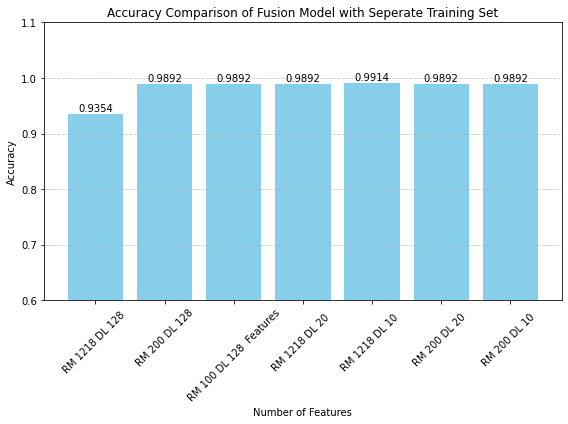

In [ ]:
data = Final_accuracy_test

# Extract model names and corresponding accuracies for each scenario
# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(data.keys(), data.values(), color='skyblue')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Fusion Model with Seperate Training Set')
plt.ylim(0.6, 1.1)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()